# <font color='red'>Spotify Song & Genre Analysis</font>
# <font color = 'blue'> GROUP ID: </font> 73

## <font color='blue'>Group Members:</font> Cihan Neşvat - Rana İşlek

## Introduction
The dataset has a sample of 170,000 songs from Spotify, and there are additional sheets that aggregate data by artist, year, or genre.

Spotify provides these audio features for a track:

<font color='blue'>Explicit:</font> The binary value whether the track contains explicit content (1) or not (0).

<font color='blue'>Danceability:</font> How suitable a track is for dancing, from 0.0 (least danceable) to 1.0 (most danceable).

<font color='blue'>Liveness:</font> Whether there's a live audience in the recording, from 0.0 (low probablity) to 1.0 (high probability). A value above 0.8 provides strong likelihood that the track is live.

<font color='blue'>Duration:</font> The song length, in milliseconds - this typically ranges from 200k to 300k

<font color='blue'>Instrumentalness:</font> Predicts whether a track contains no vocals. The closer this is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

<font color='blue'>Acousticness:</font> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

<font color='blue'>Loudness:</font> The overall loudness of a track in decibels (dB), with a typical range between -60 and 0 db.

<font color='blue'>Popularity:</font> The popularity of a track in the US based on how frequently and recently it's played. Ranges from 0 (obscure) to 100 (very popular).

<font color='blue'>Valence:</font> A measure from 0.0 (more negative) to 1.0 (positive) describing the musical positiveness conveyed by a track.

<font color='blue'>Speechiness:</font> Detects the presence of spoken words in a track. Values below 0.33 most likely represent music. 0.33 and 0.66 describe tracks that may contain both music and speech. The track has more spoken word from 0.66 to 1.0.

<font color='blue'>Tempo:</font> The overall estimated tempo of a track in beats per minute (BPM).

<font color='blue'>Energy:</font> A measure that represents a perceptual measure of intensity and activity, from 0.0 (low energy) to 1.0 (high energy).

## Utilized Datasets
- data.csv
-data_by_genres.csv
-data_w_genres.csv

We used these 3 above sets which are provided for our CS210 project. We did not use any additional datasets.

# <font color='brown'> MileStone 1 - Exploratory Data Analysis

- <font color='red'>Visualizations Descriptive Statistics
- <font color='red'>Visualizations of Aggregated Forms Based on Features
- <font color='red'>Analysis of the Most Popular Artists and Songs
- <font color='red'>How Songs of Different Genres Change Over Time

#### import libraries

In [1]:
import numpy as np 
import pandas as pd 
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='red'>Visualizations Descriptive Statistics</font>

Read the datasets:

In [2]:
data = pd.read_csv('data.csv')
data_w_genres = pd.read_csv('data_w_genres.csv')
data_by_genres = pd.read_csv('data_by_genres.csv')

### Lets check the NA and null values:

In [3]:
data.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [4]:
data_w_genres.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

In [5]:
data_by_genres.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [6]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [7]:
data_w_genres.isnull().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

In [8]:
data_by_genres.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

There are no missing or null values. data.isna(), data.isnull() returns the number of missing values in each column.

But there are some empty lists in data_w_genres.csv & data_by_genres.csv as shown below. We will clean them later in the following program.

### heads

In [9]:
data.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

In [10]:
data_w_genres.head()

artists  acousticness  \
0                   "Cats" 1981 Original London Cast      0.598500   
1                          "Cats" 1983 Broadway Cast      0.862538   
2        "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.510714   

   danceability    duration_ms    energy  instrumentalness  liveness  \
0      0.470100  267072.000000  0.376203          0.010261  0.283050   
1      0.441731  287280.000000  0.406808          0.081158  0.315215   
2      0.348286  328920.000000  0.286571          0.024593  0.325786   
3      0.425074  262890.962963  0.245770          0.073587  0.275481   
4      0.467143  270436.142857  0.488286          0.009400  0.195000   

    loudness  speechiness       tempo   valence  popularity  key  mode  count  \
0 -14.434300     0.209150  114.128800  0.358320   38.200000    5     1     10   
1 -10.690000     0.176212  103.044154  0.268865   31.538462    5     1     26   
2 -15.230714     0.118514   77.375857  0.354857   34.571429    0     1      7   
3 -15.639370     0.123200   88.667630  0.372030   34.407407    0     1     27   
4 -10.236714     0.098543  122.835857  0.482286   42.000000    5     1      7   

           genres  
0  ['show tunes']  
1              []  
2              []  
3              []  
4              []

In [11]:
data_by_genres.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.754600      0.284100  3.525932e+05  0.159580   
1                   432hz      0.485515      0.312000  1.047430e+06  0.391678   
2                   8-bit      0.028900      0.673000  1.334540e+05  0.950000   
3                      []      0.535793      0.546937  2.495312e+05  0.485430   
4              a cappella      0.694276      0.516172  2.018391e+05  0.330533   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.484374  0.168580 -22.153400     0.062060   91.351000  0.143380   
1          0.477250  0.265940 -18.131267     0.071717  118.900933  0.236483   
2          0.630000  0.069000  -7.899000     0.292000  192.816000  0.997000   
3          0.278442  0.220970 -11.624754     0.101511  116.068980  0.486361   
4          0.036080  0.222983 -12.656547     0.083627  105.506031  0.454077   

   popularity  key  mode  
0    6.600000    4     1  
1   41.200000   11     1  
2    0.000000    5     1  
3   12.350770    7     1  
4   39.086248    7     1

### describe 

In [12]:
data.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       5.205305       0.211123   
std         0.251978          0.334574       3.518292       0.180493   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.099200   
50%         0.000000          0.000524       5.000000       0.138000   
75%         0.000000          0.252000       8.000000       0.270000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean      -11.750865       0.702384      25.693381       0.105729   
std         5.691591       0.457211      21.872740       0.182260   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.908000       0.000000       1.000000       0.035200   
50%       -10.836000       1.000000      25.000000       0.045500   
75%        -7.499000       1.000000      42.000000       0.076300   
max         3.855000       1.000000     100.000000       0.971000   

               tempo        valence           year  
count  174389.000000  174389.000000  174389.000000  
mean      117.006500       0.524533    1977.061764  
std        30.254178       0.264477      26.907950  
min         0.000000       0.000000    1920.000000  
25%        93.931000       0.311000    1955.000000  
50%       115.816000       0.536000    1977.000000  
75%       135.011000       0.743000    1999.000000  
max       243.507000       1.000000    2021.000000

In [13]:
data_w_genres.describe()

acousticness  danceability   duration_ms        energy  \
count  32539.000000  32539.000000  3.253900e+04  32539.000000   
mean       0.455682      0.552737  2.485982e+05      0.525908   
std        0.383678      0.176445  1.581808e+05      0.267402   
min        0.000000      0.000000  8.042000e+03      0.000000   
25%        0.055155      0.436487  1.804616e+05      0.299000   
50%        0.391833      0.563000  2.215070e+05      0.537375   
75%        0.876000      0.684500  2.815870e+05      0.747039   
max        0.996000      0.987000  4.696690e+06      1.000000   

       instrumentalness      liveness      loudness   speechiness  \
count      32539.000000  32539.000000  32539.000000  32539.000000   
mean           0.233281      0.209035    -11.008171      0.092047   
std            0.334487      0.151781      5.568630      0.111257   
min            0.000000      0.000000    -60.000000      0.000000   
25%            0.000012      0.109000    -13.792500      0.039700   
50%            0.009550      0.162000     -9.887000      0.052822   
75%            0.451149      0.259500     -6.944500      0.090800   
max            1.000000      0.986000      3.367000      0.971000   

              tempo       valence    popularity           key          mode  \
count  32539.000000  32539.000000  32539.000000  32539.000000  32539.000000   
mean     117.433745      0.498812     24.473452      5.459787      0.734903   
std       24.467506      0.247154     23.021041      3.473653      0.441392   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      100.983500      0.305792      0.000000      2.000000      0.000000   
50%      118.779000      0.506000     22.666667      6.000000      1.000000   
75%      130.552000      0.691500     43.141941      8.000000      1.000000   
max      219.833000      0.997000     94.000000     11.000000      1.000000   

              count  
count  32539.000000  
mean      12.561818  
std       52.407821  
min        1.000000  
25%        2.000000  
50%        2.000000  
75%        7.000000  
max     3179.000000

In [14]:
data_by_genres.describe()

acousticness  danceability   duration_ms       energy  \
count   3232.000000   3232.000000  3.232000e+03  3232.000000   
mean       0.368161      0.540810  2.614567e+05     0.583474   
std        0.319697      0.149353  1.255810e+05     0.232931   
min        0.000001      0.063200  3.094600e+04     0.000953   
25%        0.082914      0.450250  2.068497e+05     0.419648   
50%        0.280119      0.550334  2.418786e+05     0.622982   
75%        0.629265      0.645470  2.873741e+05     0.756599   
max        0.996000      0.940000  3.478338e+06     0.999000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       3232.000000  3232.000000  3232.000000  3232.000000  3232.000000   
mean           0.254888     0.204010   -10.396208     0.084999   119.707549   
std            0.283907     0.103440     5.024042     0.081157    17.333590   
min            0.000000     0.016500   -40.637000     0.024300    61.364269   
25%            0.013383     0.142317   -12.212486     0.046431   109.480352   
50%            0.128343     0.185618    -9.097583     0.060769   120.142000   
75%            0.443383     0.233807    -7.038634     0.091795   128.253833   
max            0.984000     0.944000    -0.862000     0.956000   211.968000   

           valence   popularity          key         mode  
count  3232.000000  3232.000000  3232.000000  3232.000000  
mean      0.483757    29.701618     5.942450     0.819926  
std       0.200382    18.415394     3.342851     0.384309  
min       0.019285     0.000000     0.000000     0.000000  
25%       0.341571    15.190070     3.000000     1.000000  
50%       0.488364    32.181281     7.000000     1.000000  
75%       0.626171    43.069058     9.000000     1.000000  
max       0.997000    79.000000    11.000000     1.000000

### infos

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [16]:
data_w_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
 15  genres            32539 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [17]:
data_by_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            3232 non-null   object 
 1   acousticness      3232 non-null   float64
 2   danceability      3232 non-null   float64
 3   duration_ms       3232 non-null   float64
 4   energy            3232 non-null   float64
 5   instrumentalness  3232 non-null   float64
 6   liveness          3232 non-null   float64
 7   loudness          3232 non-null   float64
 8   speechiness       3232 non-null   float64
 9   tempo             3232 non-null   float64
 10  valence           3232 non-null   float64
 11  popularity        3232 non-null   float64
 12  key               3232 non-null   int64  
 13  mode              3232 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.6+ KB


## <font color='red'>Visualizations of Aggregated Forms Based on Features</font>

First, let's observe correlations between all pairwise features by using below figures:

### How song features are correlated with each other?

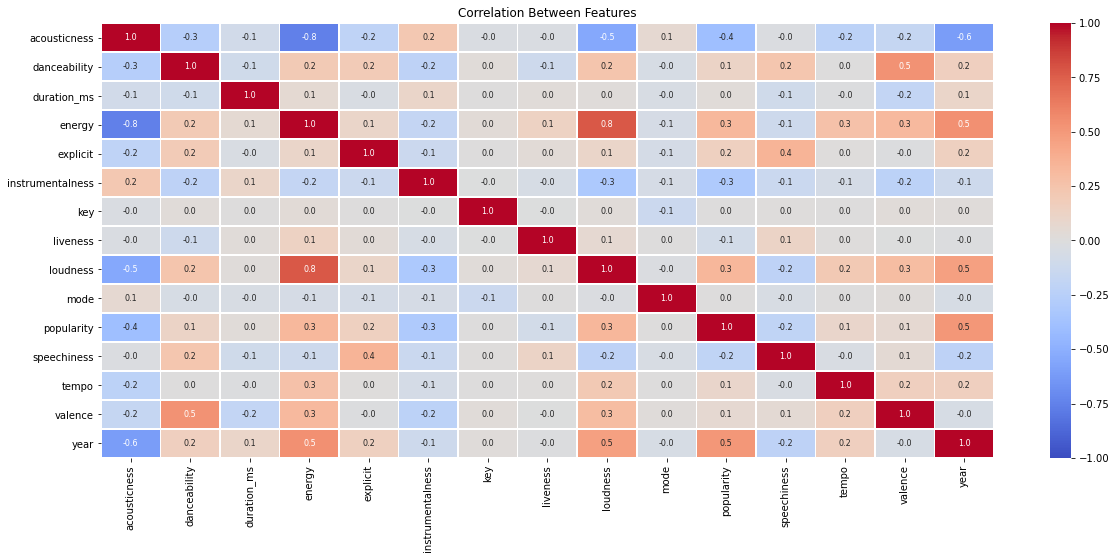

In [18]:
# finding correlation
corr = data.corr()
# visualizing correlaiton with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,linewidth=.5,square=False, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

Now, let's observe how features change over time:
### How do song trends change over time?

In [19]:
avg_by_year = data[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year"]].groupby("year").mean().sort_values(by="year").reset_index()

avg_by_year.head()

year  acousticness  danceability    energy  instrumentalness  liveness  \
0  1920      0.631242      0.515750  0.418700          0.354219  0.216049   
1  1921      0.862105      0.432171  0.241136          0.337158  0.205219   
2  1922      0.828934      0.575620  0.226173          0.254776  0.256662   
3  1923      0.957247      0.577341  0.262406          0.371733  0.227462   
4  1924      0.940200      0.549894  0.344347          0.581701  0.235219   

        tempo   valence   loudness  speechiness  
0  113.226900  0.498210 -12.654020     0.082984  
1  102.425397  0.378276 -16.811660     0.078952  
2  100.033149  0.571190 -20.840083     0.464368  
3  114.010730  0.625492 -14.129211     0.093949  
4  120.689572  0.663725 -14.231343     0.092089

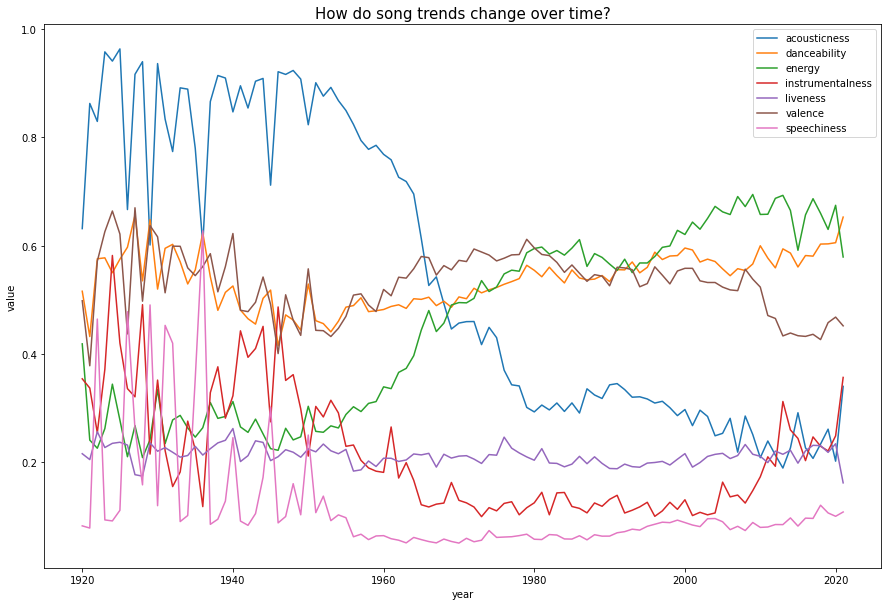

In [20]:
# Create a line plot
plt.figure(figsize=(15,10))
plt.title("How do song trends change over time?", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=avg_by_year)
    
    
plt.ylabel("value")
plt.legend(lines)

In the above figures, there is a thing that caught our attention: the correlation between acousticness and energy is almost 'strong negative correlation' (corr is very close to -1).
Also, we can clearly see that the peak of the feature 'acousticness' is in between 1920-1965, on the other the peak of the feature 'energy' is in between 1980-2020. Therefore, these correlations can be used for identify the decades, this might be our focus in the following milestones.

We can see the correlation between <font color='red'>acousticness</font> and <font color='red'>energy</font> in the following figure:

### What is the correlation between 'acousticness' and 'energy'?

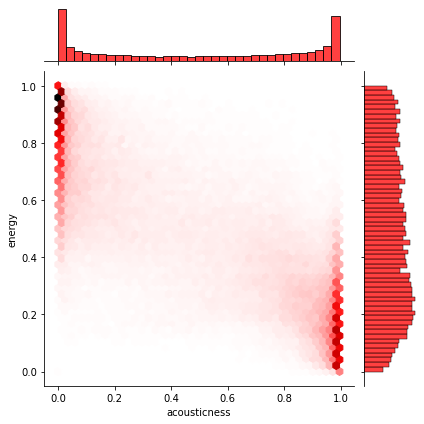

In [21]:
sns.jointplot(x='acousticness', y='energy',data=data, kind="hex", color="red")

Also here, we can observe that energy and acousticness are highly negative correlated.

#### a closer look at acousticness over the years

In [22]:
acousticness = data.groupby('year')['acousticness'].mean()
acousticness = acousticness.reset_index()
acousticness.columns = ['year', 'mean']

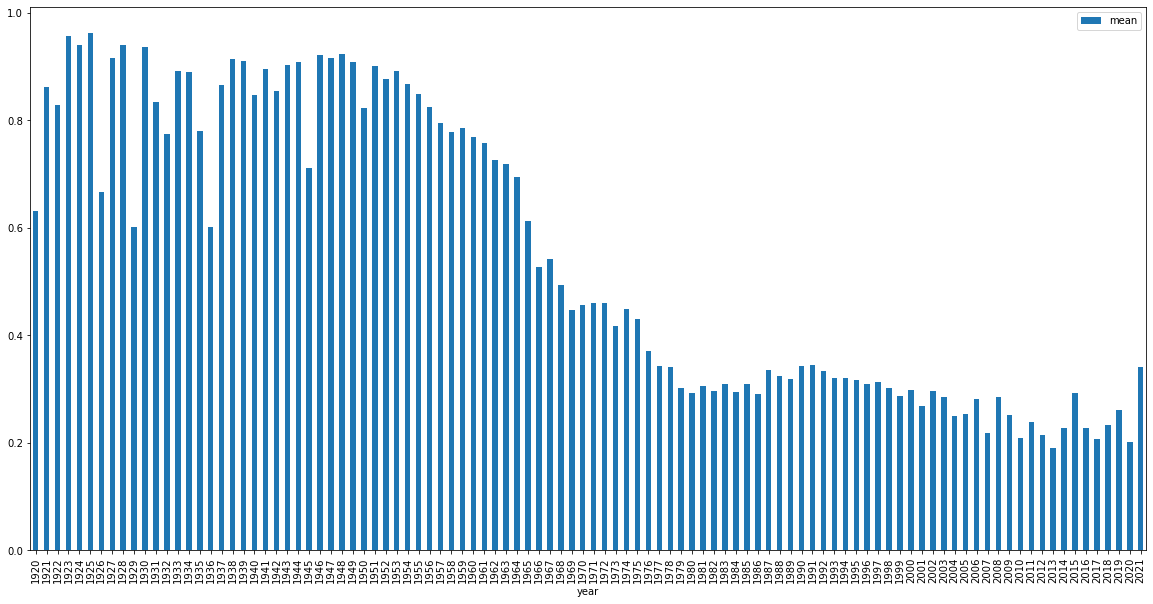

In [23]:
ax = acousticness.plot.bar(x='year', y='mean', figsize=(20,10))

Also, the above figure shows us a clear drop of acousticness as we move to 2000's:

### a closer look at energy over the years

In [24]:
energy = data.groupby('year')['energy'].mean()
energy = energy.reset_index()
energy.columns = ['year', 'mean']

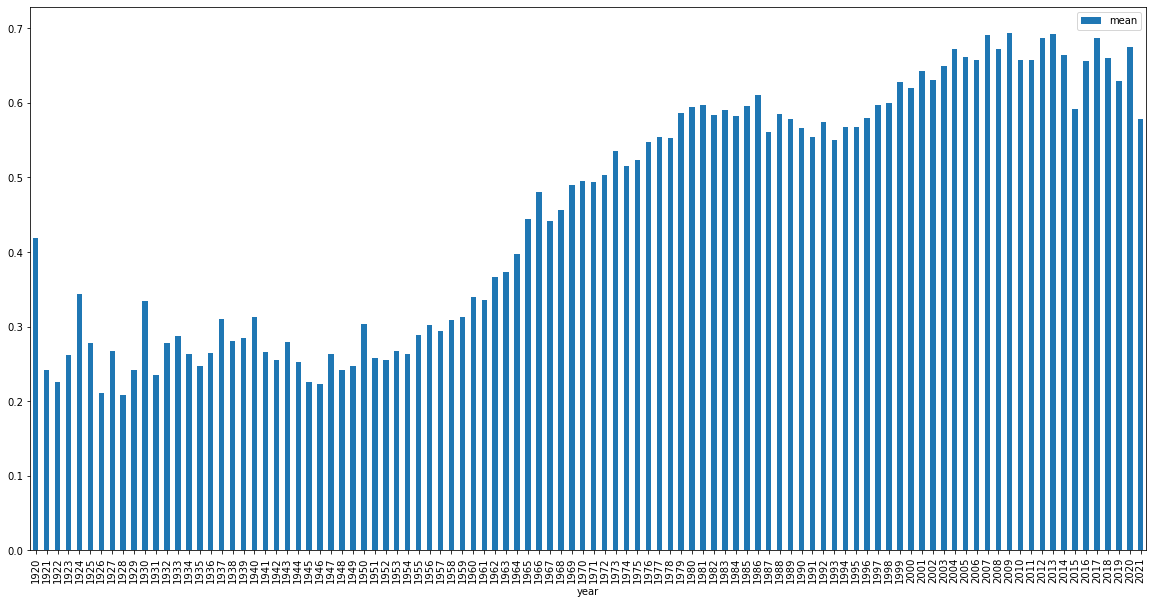

In [25]:
ax = energy.plot.bar(x='year', y='mean', figsize=(20,10))

Similarly, the above figure shows us a clear rise of energy as we move to 2000's:

## <font color='red'>Analysis of the Most Popular Artists and Songs</font>

In [26]:
#sort by popularity
pop = data.sort_values('popularity', ascending=False).head(20)
pop = pop[['artists', 'name', 'popularity', 'year']]

In [27]:
pop

artists  \
20062                  ['Olivia Rodrigo']   
19862           ['24kGoldn', 'iann dior']   
19866                   ['Ariana Grande']   
19886        ['Bad Bunny', 'Jhay Cortez']   
19976                         ['KAROL G']   
19868                   ['Ariana Grande']   
19870                              ['CJ']   
19872                   ['The Kid LAROI']   
19876                   ['Billie Eilish']   
19928            ['Bad Bunny', 'ROSALÍA']   
19900                      ['Tate McRae']   
19878                       ['Pop Smoke']   
39252                          ['Tiësto']   
76406                            ['Boza']   
19884                       ['Lil Nas X']   
19880  ['Cardi B', 'Megan Thee Stallion']   
19908   ['Justin Bieber', 'benny blanco']   
20068                   ['Justin Bieber']   
19924   ['Shawn Mendes', 'Justin Bieber']   
19864                             ['SZA']   

                                         name  popularity  year  
20062                         drivers license         100  2021  
19862                  Mood (feat. iann dior)          96  2020  
19866                               positions          96  2020  
19886                                  DÁKITI          95  2020  
19976                                 BICHOTA          95  2020  
19868                                   34+35          94  2020  
19870                                 Whoopty          94  2020  
19872                             WITHOUT YOU          94  2020  
19876                          Therefore I Am          94  2020  
19928                      LA NOCHE DE ANOCHE          94  2020  
19900                      you broke me first          93  2020  
19878                 What You Know Bout Love          93  2020  
39252                            The Business          92  2020  
76406                            Hecha Pa' Mi          92  2020  
19884                                 HOLIDAY          92  2020  
19880         WAP (feat. Megan Thee Stallion)          92  2020  
19908              Lonely (with benny blanco)          92  2020  
20068                                  Anyone          92  2021  
19924  Monster (Shawn Mendes & Justin Bieber)          91  2020  
19864                               Good Days          91  2020

In [28]:
pop_year = data.sort_values('popularity', ascending=False).groupby('year').first()
pop_year = pop_year.reset_index()

In [29]:
pop_year = pop_year[['year', 'artists', 'name', 'popularity']]

In [30]:
pop_year.head(10)

year                                            artists  \
0  1920           ['Exquisite Classic', 'Antonio Vivaldi']   
1  1921                                     ['Dennis Day']   
2  1922                                            ['Uli']   
3  1923                                   ['Bessie Smith']   
4  1924  ['Paul Whiteman & His Orchestra', 'Bix Beiderb...   
5  1925                                   ['Tommy Dorsey']   
6  1926                                    ['Fats Waller']   
7  1927                                ['Bix Beiderbecke']   
8  1928                                  ['Benny Goodman']   
9  1929                                ['Louis Armstrong']   

                                                name  popularity  
0        Violin Concerto in F minor, RV 297 - Winter          28  
1                            Clancy Lowered the Boom           6  
2                                              Carve           6  
3          Nobody Knows You When You're Down and Out          41  
4            Mississippi Mud (feat. Bix Beiderbecke)          15  
5  On the Sunny Side of the Street (From "Is Ever...          36  
6                                  Ain't Misbehavin'          47  
7                                  Singin' The Blues          39  
8                                   Sing, Sing, Sing          50  
9                                     Mack the Knife          51

In [31]:
pop_year.tail(10)

year                    artists  \
92   2012          ['Michael Bublé']   
93   2013      ['The Neighbourhood']   
94   2014          ['Ariana Grande']   
95   2015      ['The Neighbourhood']   
96   2016           ['James Arthur']   
97   2017        ['Imagine Dragons']   
98   2018                    ['Sia']   
99   2019           ['Harry Styles']   
100  2020  ['24kGoldn', 'iann dior']   
101  2021         ['Olivia Rodrigo']   

                                            name  popularity  
92   It's Beginning to Look a Lot like Christmas          85  
93                               Sweater Weather          89  
94                                 Santa Tell Me          88  
95                                  Daddy Issues          87  
96                                   Train Wreck          88  
97                                      Believer          87  
98                                       Snowman          91  
99                              Watermelon Sugar          91  
100                       Mood (feat. iann dior)          96  
101                              drivers license         100

### a closer look at popularity over the years

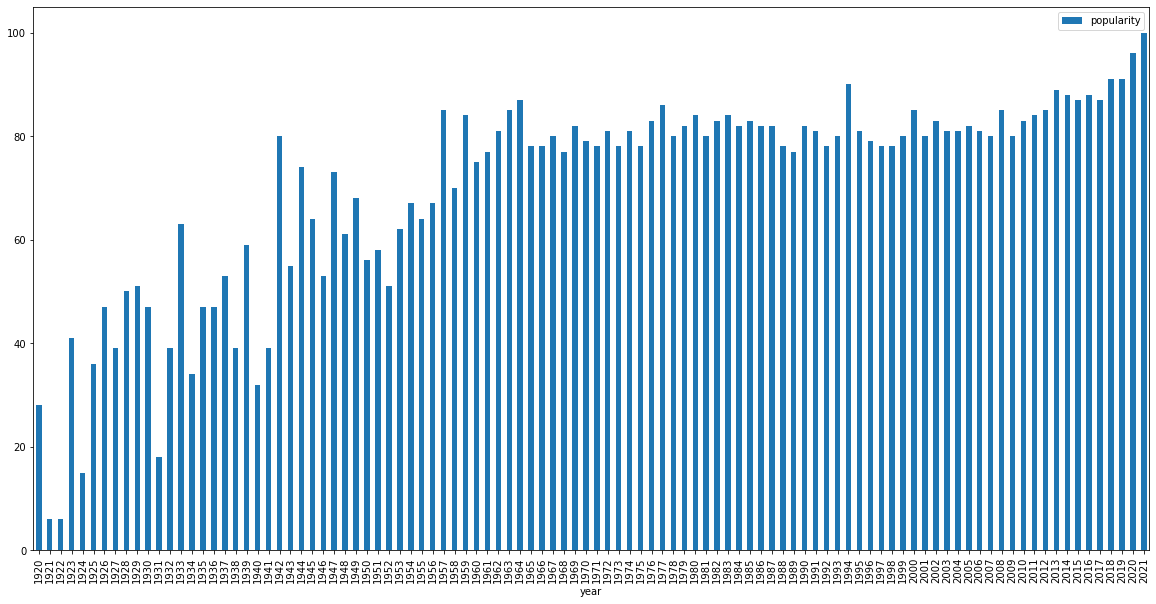

In [32]:
ax = pop_year.plot.bar(x='year', y='popularity', figsize=(20,10))

# <font color='blue'>We will now study the data in three groups with respect to time:

## <font color='red'> 1960-1979, 1980-1999, 2000-2020

In [33]:
#read data between 1960-1979
df60_79 = data[(data['year'] >= 1960) & (data['year'] <= 1979)]

#read data between 1980-1999
df80_99 = data[(data['year'] >= 1980) & (data['year'] <= 1999)]

#read data between 2000-2020
df00_20 = data[(data['year'] >= 2000) & (data['year'] <= 2020)]

## How are tempo, danceability, acousticness and energy related to each other?
Since we observed that acousticness and energy is negatively correlated, now we want to observe the relation between tempo and energy, in three time intervals. Because we see that the feature trends are changing through the years and decades.

### 1960 - 1979

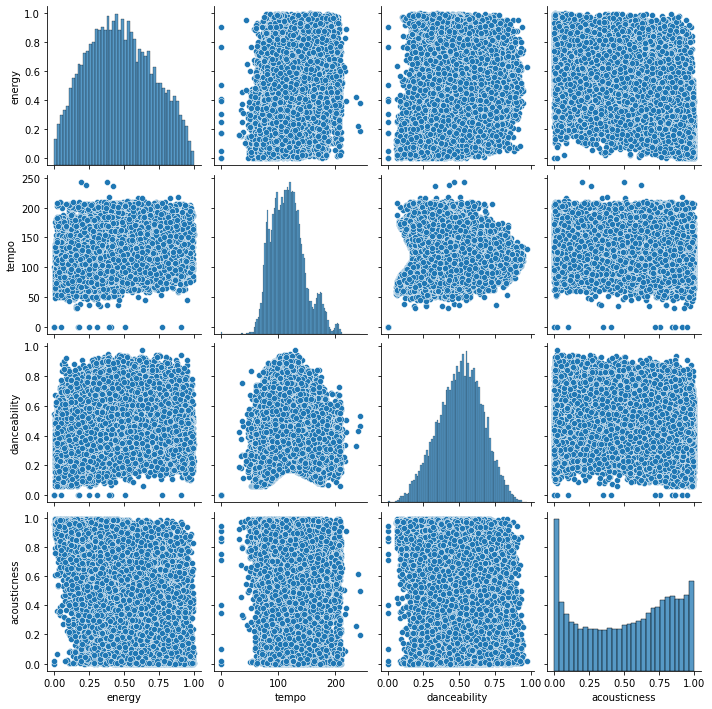

In [34]:
sns.pairplot(df60_79, vars = ["energy", "tempo", "danceability", "acousticness"], dropna = True);

### 1980 - 1999

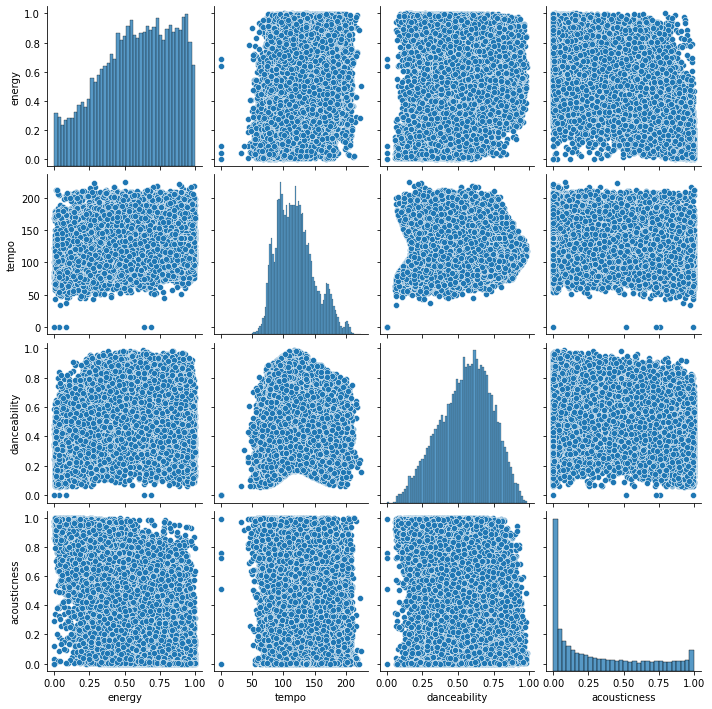

In [35]:
sns.pairplot(df80_99, vars = ["energy", "tempo", "danceability", "acousticness"], dropna = True);

### 2000 - 2020

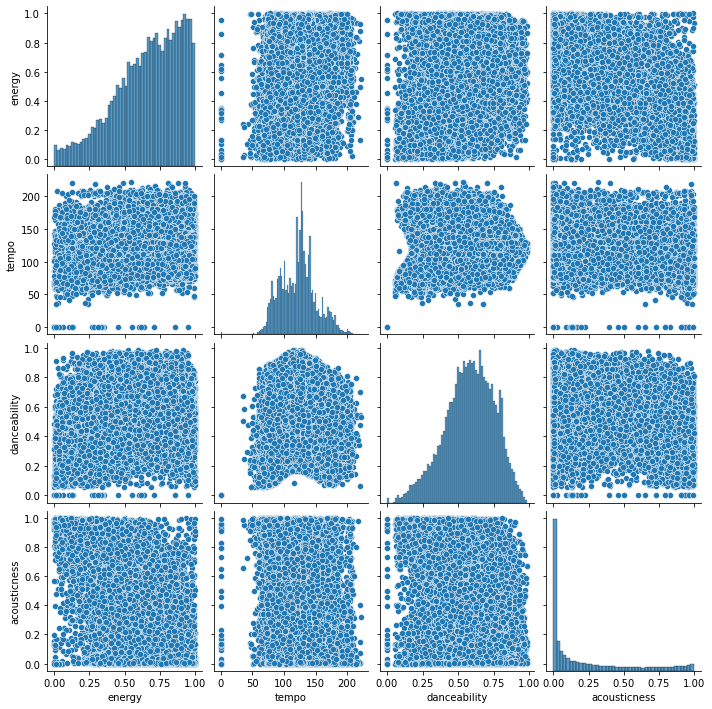

In [36]:
sns.pairplot(df00_20, vars = ["energy", "tempo", "danceability", "acousticness"], dropna = True);

In the above figure, we can observe correlations between all features between the 60's-80's, 80's-2000's and 2000's-2020's. So, using pairplot is one of the most efficient ways to observe datas. 

### How artists' popularities change in our three time intervals?

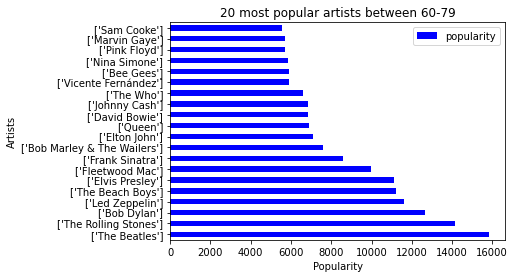

In [37]:
artists_grp = df60_79.groupby(['artists'])
Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='blue')
plt.title('20 most popular artists between 60-79')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

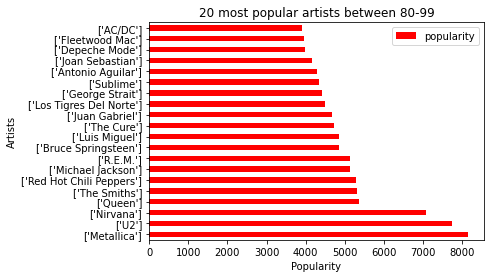

In [38]:
artists_grp = df80_99.groupby(['artists'])
Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='red')
plt.title('20 most popular artists between 80-99')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

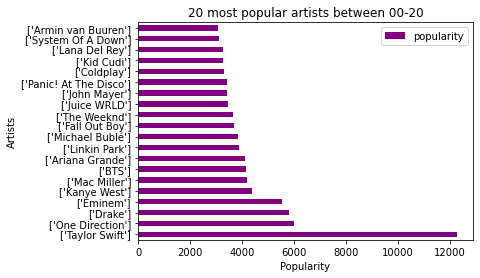

In [39]:
artists_grp = df00_20.groupby(['artists'])
Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='purple')
plt.title('20 most popular artists between 00-20')
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.show()

### How songs' popularities change in our three time intervals?

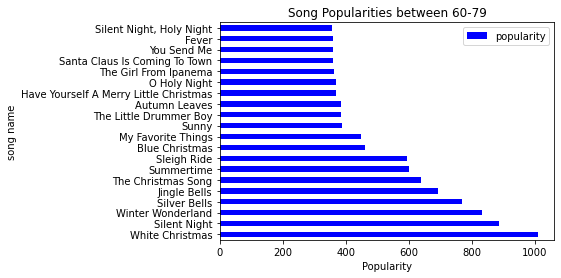

In [40]:
artists_grp = df60_79.groupby(['name'])
Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='blue')
plt.title('Song Popularities between 60-79')
plt.xlabel('Popularity')
plt.ylabel('song name')
plt.show()

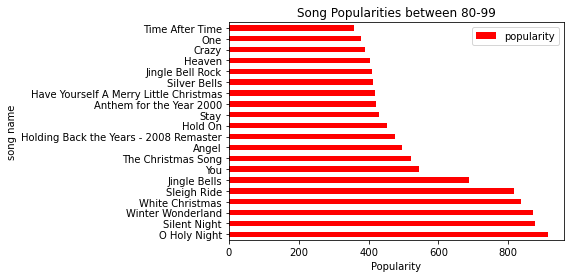

In [41]:
artists_grp = df80_99.groupby(['name'])
Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='red')
plt.title('Song Popularities between 80-99')
plt.xlabel('Popularity')
plt.ylabel('song name')
plt.show()

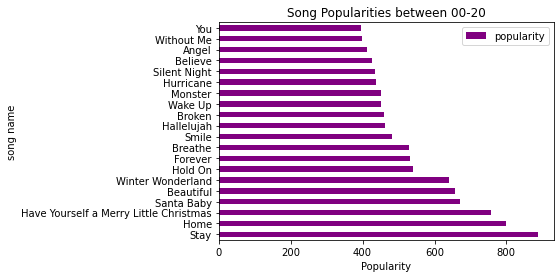

In [42]:
artists_grp = df00_20.groupby(['name'])
Top20artists = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
Top20artists.plot.barh(color='purple')
plt.title('Song Popularities between 00-20')
plt.xlabel('Popularity')
plt.ylabel('song name')
plt.show()

# <font color='red'>How Songs of Different Genres Change Over Time</font>

### Exploration of genres

In [43]:
def split_df(df,target_column,delimiters): #splits the target column of df by the separator, return separated df.
    regexPattern = "|".join(map(re.escape,delimiters))
    def list_to_row(row,row_accumulator,target_column,regexPattern):
        split_row = re.split(regexPattern,row[target_column])
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(list_to_row,axis=1,args = (new_rows,target_column,regexPattern))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [44]:
# Taking the first artists, merging genres by artists
from ast import literal_eval
total_artist_df = data.copy()
total_artist_df['artists'] = total_artist_df['artists'].map(lambda x: literal_eval(x))
total_artist_df['artists'] = total_artist_df['artists'].map(lambda x: x[0])
genres = pd.merge(total_artist_df, data_w_genres, on='artists')

In [45]:
# Finding the total number of artists by using groupby method
artists_count = total_artist_df.groupby('artists').count().iloc[:,0]
artists_count = artists_count.reset_index()
artists_count.columns = ['artists', 'count']
total_artist_df = pd.merge(total_artist_df, artists_count, on='artists')

In [46]:
total_artist_df['count'] = total_artist_df['count'].astype(int)

In [47]:
# Splitting multiple genres
several_genres_df = split_df(genres,'genres',',')
several_genres_df['genres'] = several_genres_df['genres'].map(lambda x: re.sub(r'\W+', '', x))

In [48]:
# Filter genres with no values
several_genres_df = several_genres_df[several_genres_df.genres != '']

In [49]:
# Create a new df containing genre and years
years_w_genres = several_genres_df.groupby('year')['genres'].apply(list)
years_w_genres = years_w_genres.reset_index()

In [50]:
years_w_genres['most_common'] = years_w_genres['genres'].map(lambda x: Counter(x).most_common(1)[0][0])
years_w_genres['count_most_common'] = years_w_genres['genres'].map(lambda x: Counter(x).most_common(1)[0][1])  

In [51]:
total_year = total_artist_df.groupby('year').count().iloc[:,1]
total_year = total_year.reset_index()
total_year.columns = ['year', 'total']

In [52]:
years_w_genres = pd.merge(years_w_genres, total_year, on='year')

In [53]:
years_w_genres['percentage_of_most_common'] = (years_w_genres['count_most_common'] / years_w_genres['total'])*100

**years_w_genres data frame represents the most popular genres of each year. The information this data frame holds can be visualized as the below graph.**

**For example, this graph in the below shows that about %45 percent of the all songs in the year 1977 were rock music:**

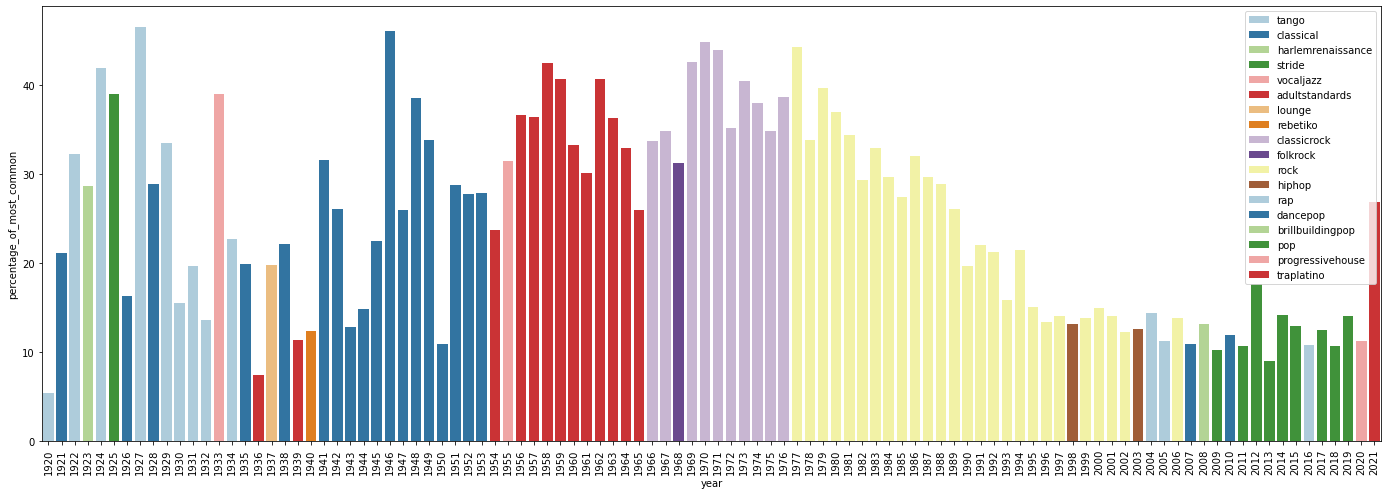

In [54]:
fig,ax = plt.subplots()
fig.set_size_inches(24,8)
ax = sns.barplot(x='year',y='percentage_of_most_common',hue='most_common', data=years_w_genres, dodge=False, palette='Paired')
plt.xticks(rotation=90)
ax.legend(loc='upper right')
plt.show()

### a closer look at most common genre of each year from the table

In [55]:
years_w_genres

year                                             genres  \
0    1920  [harlemrenaissance, traditionalblues, harlemre...   
1    1921  [cabaret, vintagehollywood, cabaret, vintageho...   
2    1922  [vintagechanson, vintagechanson, cabaret, vint...   
3    1923  [tango, vintagetango, tango, vintagetango, tan...   
4    1924  [tango, vintagetango, tango, vintagetango, tan...   
..    ...                                                ...   
97   2017  [adultstandards, easylistening, lounge, classi...   
98   2018  [adultstandards, easylistening, lounge, adults...   
99   2019  [classical, lateromanticera, operetta, classic...   
100  2020  [classical, classicalera, earlyromanticera, ge...   
101  2021  [classical, lateromanticera, operetta, classic...   

           most_common  count_most_common  total  percentage_of_most_common  
0                tango                 19    349                   5.444126  
1            classical                 33    156                  21.153846  
2                tango                 39    121                  32.231405  
3    harlemrenaissance                 53    185                  28.648649  
4                tango                 99    236                  41.949153  
..                 ...                ...    ...                        ...  
97                 pop                270   2156                  12.523191  
98                 pop                292   2714                  10.759027  
99                 pop                328   2329                  14.083298  
100   progressivehouse                483   4294                  11.248253  
101         traplatino                494   1840                  26.847826  

[102 rows x 6 columns]

**end of milestone 1**

# <font color='blue'> MileStone 2 - Statistical Analysis & Hypothesis Testing

### Tasks:

- ### <font color='red'>Statistical tests to check how (or if) features contribute to popularity of songs
- ### <font color='red'>Statistical tests to check if significant differences exist between different eras


# <font color='purple'> Hypothesis Outline:

We will generate a null hypothesis and an alternative hypothesis and then use statistic tests in order to reject or 
fail to reject our null hypothesis.

**Note:** In this project, it is assumed that all of the song features are normally distributed in the dataset.

We will go step by step,

#### <font color='purple'> Step 1: Generate Hypotheses
First, we specify the null and alternative hypotheses:


Null Hypothesis:
- $\large H_0: \rho = 0$  

Alternative Hypothesis:
- $\large H_A: \rho ≠ 0$  


#### <font color='purple'> Step 2: Test Statistic
Second, we calculate the p-value by using various test statistic, such as:
- two-sample t test
- chi square test
- one-way ANOVA test
    
**We will specify the necessary test in the following lines below before we apply them to our data.**



#### <font color='purple'> Step 3: P-Value
We use the test statistic to calculate the P-value. As always, the P-value is the answer to the question **"how likely is it that we’d get a test statistic as extreme as we did if the null hypothesis were true?"** The P-value is determined by referring to a t-distribution with n-2 degrees of freedom.

#### <font color='purple'> Step 4: Decision
Finally, we make a decision:

So, If the P-value is smaller than the `significance level` (0.05), we reject the null hypothesis in favor of the alternative. We conclude **"there is sufficient evidence at the level to conclude that our alte"**

Thus, we will be able to make a decision between our null hypothesis and alternative hypothesis.

Standard significance value is 0.05, we will stick to that.

# <font color='purple'> FUNCTIONS:

We created 3 functions in order to apply 3 seperate tests without dublicating code. 
These tests are two sample t-test, chi-square test and one-way ANOVA.
    
We will use t-test and chi-square test to find the relation between two song features and we will use one-way ANOVA test to find If there are significant 
differences between three music eras of the same song trend.

## <font color='purple'> Function 1: <font color='black'> Two-Sample T Test

**Below function is used to perform two-sample t test. In this function we pass two features that we want to perform test on and the data frame that contains these features. By the requirements of this test we assume our features are normally distributed and are independent.
We will state our hypotheses and the job of this function in the following lines just before we use the function.**

**The way this function performs is also further explained in the function docstring with some examples.**

In [57]:
from scipy.stats import ttest_ind

In [58]:
def apply_TwoSample_t(feature1, feature2, df):
    '''
    This function takes two song features and a data frame that contains these features as parameters. 
    Function first calculates the mean value of feature1 and splits the data frame into two groups (below-mean, above-mean) with respect
    to that value. With this operation, two groups will serve as two 'samples' and feature2 will remain as a continious feature.
    Therefore the performed two-sample t test will concluce if there are significant differences of feature2 over two samples of feature1.
    
    This function uses ttest_ind function from scipy.stats library in order to calculate t statistic and corresponding p-value.
    We will conclude our hypotheses after we apply this function and see the p-value.
    
    This function also visualiazes the change in feature2 in both below and above groups by using 
    "kernel distribution estimation plot", .kdeplot(), from seaborn library. This is a helpful visualization because it will give an insight on 
    the change in feature2 over our two sample groups.
    
    Note: Standart significance level is 0.05 and we will stick to that.
    
    PARAMETERS:
    feature 1: this is our so called 'field'. Dataframe is split into two groups with respect to this feature's mean.
    
    feature 2: this is our continious dataset. Effects of feature 1 is studyied on this parameter.
    
    df: this is the data frame which contains both features in it and it will be splitted.
    
    --------------------------
    
    example 1: feature 1 is an apple field in which we grow apples,
               feature 2 is the size of apples that are grown.
               Our aim here is to split the apple field into half and perfom a two-sample t test. (Assume that there are differences in 
               apple sizes on two different sides of the field) So that we can see If the differences in  apple sizes are significant
               or is it just luck? By doing this we observe the effects of field location over apple size.
               
    example 2: feature 1 is danceability,
               feature 2 is popularity.
               In this case we split the entire data frame with respect to the mean value of danceability. By doing this we can observe what
               happens to popularity when danceability rate is below danceability-mean and what happens when danceability rate is 
               above danceability-mean.
               Therefore danceability below and above groups will serve as our two samples and by performing two-sample t test we can
               see the significance of differences in two groups.
    '''
    
    f1_mean = df['{}'.format(feature1)].mean()
    below_group_df = df[df["{}".format(feature1)] <= f1_mean]
    above_group_df = df[df['{}'.format(feature1)] >  f1_mean]
    
    ax = sns.kdeplot(below_group_df["{}".format(feature2)], shade=True)
    sns.kdeplot(above_group_df["{}".format(feature2)], ax=ax, shade=True)
    
    lines = ["above", "below"]
    plt.ylabel("")
    plt.xlabel('')
    plt.legend(lines)
    plt.show()
    
    signifance=0.05
    below_group_values = below_group_df['{}'.format(feature2)]
    above_group_values = above_group_df['{}'.format(feature2)]

    tstat, p_value = ttest_ind(a=below_group_values, b=above_group_values, equal_var=False)
    print('\nt statistic: ',format(tstat,'.2E'))
    print("P value: ",format(p_value,".2E"))
    print("Signifance Level:", signifance)

## <font color='purple'> Function 2:<font color='black'> ChiSquare Test

**Below function is used to perform chisquare test and computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence.**

**We are going to use this function in order to see If one song features effects the other.**

**This function does the both categorization and calculation of p-value. It also prints the contingency table.**


**chi2_contingency from scipy.stats is used to perform the chisquare**


**The way function performs is explained furher in the docstring with some examples. We will of course condunct our hypotheses and explain variables before applying the function as well.**

In [59]:
from scipy.stats import chi2_contingency

In [60]:
def apply_ChiSquare(feature1: str ,feature2: str ,df):
    '''
    The Chi-Squared test is is a statistical test applied to sets of categorical data to evaluate how likely it is that 
    any observed difference between the sets arose by chance. In order to achieve this first we categorize the features with respect to their mean values.
    This is done through categorie feature1 and categorize feature2 functions which are going to applied to whole data frame.
    By applying these functions we generate new columns to the data frame and then use these columns to construct a crosstable.
    We pass the constructed crosstable to chi2_contingency function and thus we calculate the f statistic and corresponding p-value.
    We will conclude our hypotheses with respect to this p-value once we apply the function on our dataframe.
    
    PARAMETERS:
        feature1: selected feature from the data frame
        
        feature2: selected feature from the data frame
        
        df: a data frame that contains both features
    
    Note: In order to not change our original data, before doing anything we first create a copy of the original data frame.
    
    ------------------------------------------------
    
    example: feature1 is acousticness
             feature2 is explicit,
             first we calculate the mean of acousticness, assume that it is 20. Then we calculate the mean of explicit, assume that it is 5
             We categorize acousticness column with respect to its mean that is If a particular value of acousticness is below 20, then it is categorized as 
             weak acousticness and strong If otherwise. When done, this whole column containing the information of weak or strong acousticness is merged
             to the data frame.
             Same process is appylied to explicit as well.
             Now data frame has two extra columns that contain the category of our selected feature which are acousticness and explicit.
             we generate a crosstable from these two columns with the help of .crosstab() method of pandas.
             Generated crosstable is passed to chi2_contingenct function and thus we have our f statistic and corresponding p-value.
    '''
    
    df_copy = df.copy()
    f_1_mean = df_copy['{}'.format(feature1)].mean()
    f_2_mean = df_copy['{}'.format(feature2)].mean()
    
    
    def categorize_feature1(va):
        if va > f_1_mean:
            return 'strong {}'.format(feature1)
        else:
            return 'weak {}'.format(feature1)
    
    def categorize_feature2(val):
        if val > f_2_mean:
            return 'strong {}'.format(feature2)
        else:
            return 'weak {}'.format(feature2)
    
    df_copy['{} rate'.format(feature1)] = df_copy['{}'.format(feature1)].apply(categorize_feature1) #categorize feature1 with respect to its mean value
    df_copy['{} rate'.format(feature2)] = df_copy['{}'.format(feature2)].apply(categorize_feature2) #categorize feature2 with respect to its mean value
    crosstab = pd.crosstab(df_copy['{} rate'.format(feature1)], df_copy['{} rate'.format(feature2)]) #generate the cross table
    
    print("\n",crosstab) #print the crosstable
    
    
    
    chi2_test_stat, p_value, dof, expected_freqs = chi2_contingency(crosstab) #perform chisquare
    print('\n\nchi statistic:', format(chi2_test_stat,'.2E'))
    print("P value: ",format(p_value,".2E")) #print p-value
    print("Signifance Level: 0.05") #print the level of significance

## <font color='purple'> Function 3: <font color='black'> One-Way ANOVA

**Below function is used to perform one-way. ANOVA test. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.**

**We are going to use this function in order to find If there are any significant changes in a song trend over three different music eras.**


**The way function performs is explained furher in the docstring with some examples. We will of course condunct our hypotheses and explain variables before applying the function as well.**

In [61]:
from scipy.stats import f_oneway

In [62]:
def apply_ANOVA(df1, df2, df3, feature: str):
    '''
    First create a copy of the given data frames with respect to given feature.
    Plot the situation of the feature in all three timelines and plot them all together by using kdeplot in order to makes a visualiazed comparison.
    Then perform the one-way ANOVA test to see the significance of the changes throughout these timelines.
    
    PARAMETERS:
        df1: music era 1
        
        df2: music era 2
        
        df3: music era 3
        
        feature: the song feature we are aimining to observe changes on, we will later check the signifance of these changes.
        
    -------------------------------------------------------------
    
    example: df1 = songs between 1960-1979
             df2 = songs between 1980-1999
             df3 = songs between 2000-2020
             feature = valence
             
             collect 3 samples which are valence of the songs between given timelines. Do the visualization with above mentioned methods and perform the ANOVA.
             With this the corresponding p-value we will conclude our hypotheses and decide on whether changes across timelines are by chance 
             or are they signifancantly related
    '''
    
    s1 = df1['{}'.format(feature)].copy()
    s2 = df2['{}'.format(feature)].copy()
    s3 = df3['{}'.format(feature)].copy()
    
    fig, ax = plt.subplots(1, 4, figsize=(14,5))
        
    s1.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
    ax[0].set_title("sample from 60-79")

    s2.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
    ax[1].set_title("sample from 80-99")

    s3.plot(kind="hist", ax=ax[2], bins=20, label="none", color="y", density=True)
    ax[2].set_title("sample from 00-20")

    sns.kdeplot(s1, shade=True, ax=ax[3], color="c")
    sns.kdeplot(s2, shade=True, ax=ax[3], color="m")
    sns.kdeplot(s3, shade=True, ax=ax[3], color="y")
    ax[3].set_title("Comparison with KDE")

    plt.suptitle("{} distributions".format(feature))
    # To avoid suptitle and titles of ax titles colliding
    plt.tight_layout(rect=[0, 0.03, 1, 1])
    plt.show()
    
    f_stats, p_values = f_oneway(s1.values, s2.values, s3.values)
    print("\n\nf statistic:", f_stats)
    print("Signifance Level: 0.05")
    print("P value: ",format(p_values,".5E")) 

In [63]:
%matplotlib inline
sns.set(style="darkgrid")

# <font color='red'>Statistical tests to check how (or if) features contribute to popularity of songs

# <font color='brown'> Hypothesis 1: 
### $\large H_0:$ Danceability has no effect on popularity.
### $\large H_A:$ Danceability has effect on popularity.

**Testing Procedure**:

**Applying two-sample t test to danceability and popularity. Our first parameter is danceability so we will split the dataframe with respect to its mean value and study its affects on the continious popularity.**

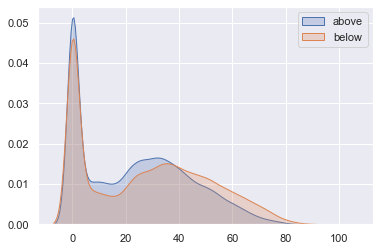


t statistic:  -3.86E+01
P value:  0.00E+00
Signifance Level: 0.05


In [64]:
apply_TwoSample_t('danceability', 'popularity',data)

#### Since p-value, 0.00, is less than significance level (alpha = 0.05) we reject the null hypothesis and continue with the alternative hypothesis.
#### Thus, there is a strong evidence that 'danceability has effect on popularity.'

# <font color='brown'> Hypothesis 2: 
### $\large H_0:$ Acousticness has no effect on popularity.
### $\large H_A:$ Acousticness has effect on popularity.

**Testing Procedure**: 

**Applying two-sample t test to acousticness and popularity. Our first parameter is acousticness so we will split the dataframe with respect to its mean value and study its affects on the continious popularity.**

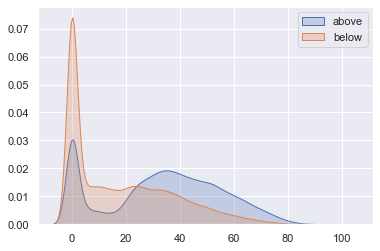


t statistic:  1.59E+02
P value:  0.00E+00
Signifance Level: 0.05


In [65]:
apply_TwoSample_t('acousticness','popularity',data)

#### Since p-value, 0.00, is less than significance level (alpha = 0.05) we reject the null hypothesis and continue with the alternative hypothesis.
#### Thus, there is a strong evidence that 'acousticness has effect on popularity.'

# <font color='brown'> Hypothesis 3: 
### $\large H_0:$ Explicit has no effect on popularity.
### $\large H_A:$ Explicit has effect on popularity.

**Testing Procedure**: 

**Applying chi square test to explicit and popularity. Our aim is to categorize both features with respect to their mean values so that we can study if there's any significant dependency between two features**

In [66]:
apply_ChiSquare('explicit','popularity',data)


 popularity rate  strong popularity  weak popularity
explicit rate                                      
strong explicit               8016             3866
weak explicit                78958            83549


chi statistic: 1.58E+03
P value:  0.00E+00
Signifance Level: 0.05


**In the above cross table we can observe that:**

**There are 8016 strong explicit songs which also have strong popularity.**

**There are 3866 strong explicits songs which also have weak popularity.**

**There are 78958 weak explicits songs which also have strong popularity.**

**There are 83549 weak explicits songs which also have weak popularity.**


#### Since p-value, 0.00, is less than significance level (alpha = 0.05) we reject the null hypothesis and continue with the alternative hypothesis.
#### Thus, explicit and popularity are not independent. There's strong evidence that there is dependency between them.

# <font color='red'>Statistical tests to check if significant differences exist between different eras (such as years between 60-79, 80-99, 00-20)

## Check of differences of valence values across different eras (60-79, 80-99, 00-20):

# <font color='brown'> Hypothesis 1: 
### $\large H_0:$ Valence over three eras is statistically the same.
### $\large H_A:$ Valence over three eras is not statistically the same.

**Testing Procedure**: 

**Applying one-way ANOVA test to valence over three different sample music eras. Our aim is to statistically observe the changes across these eras and conclude if the samples we tested are statistically different from one another or not.**

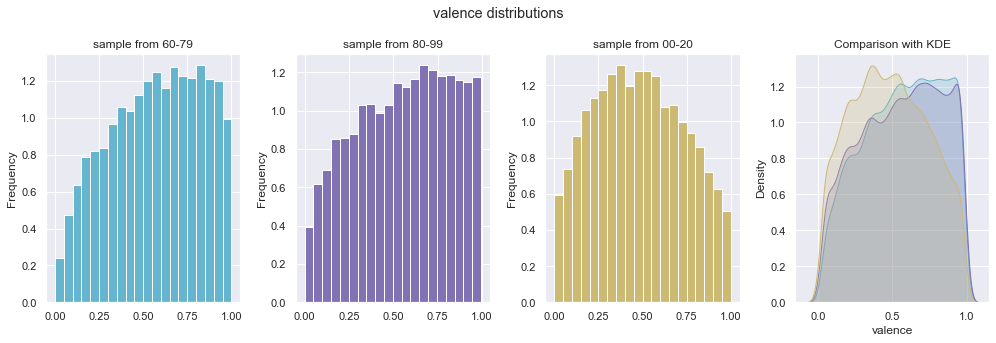



f statistic: 1241.2475048231154
Signifance Level: 0.05
P value:  0.00000E+00


In [67]:
apply_ANOVA(df60_79, df80_99, df00_20,'valence')

**Since the p-value is smaller than the threshold, we can claim that the samples we tested are statistically different from one another.**

# <font color='brown'> Hypothesis 2: 
### $\large H_0:$ Energy over three eras is statistically the same.
### $\large H_A:$ Energy over three eras is statistically the same.

**Testing Procedure**: 

**Applying one-way ANOVA test to energy over three different sample music eras. Our aim is to statistically observe the changes across these eras and conclude if the samples we tested are statistically different from one another or not.**

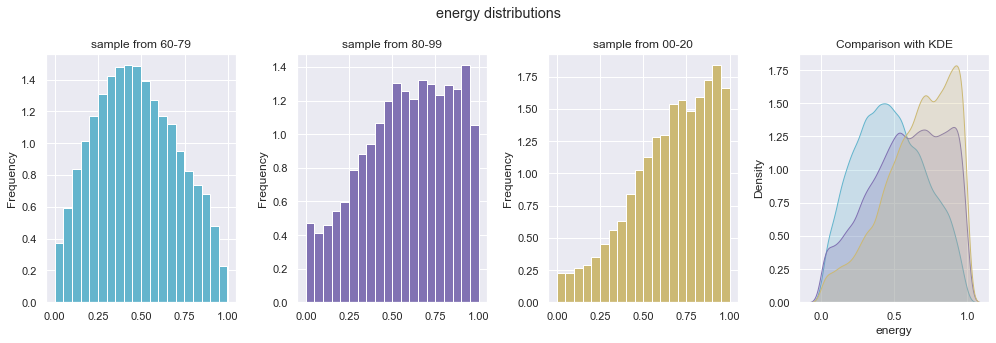



f statistic: 6076.905642163404
Signifance Level: 0.05
P value:  0.00000E+00


In [68]:
apply_ANOVA(df60_79, df80_99, df00_20, 'energy')

**Since the p-value is smaller than the threshold, we can claim that the samples we tested are statistically different from one another.**

In [69]:
#end of milestone 2

# <font color='green'> MileStone 3 - Machine Learning

### **Note:** Due to unexpected behavior of my teammate, we split up and the following codes are belongs to **Rana Islek**. I did my best to complete the code in a short time. I will continue using "we" language in markdowns.

### <font color='brown'>Tasks:

#### - <font color='purple'>Prediction of song popularity with various machine learning models
#### - <font color='purple'>Efforts on hyper-parameter tuning to increase the performance of models
#### - <font color='purple'>Creating a simple song recommendation system (The system can work as accepting a list of songs as input and returns a selected number of songs similar to the ones given in the input) using similarity metrics and Nearest Neighbors methods

In [70]:
# Import Packages again

import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore")

In [71]:
# Loading and Viewing Dataset - looking at the overall statistics such as mean, count, and median with describe()
data_frame = pd.read_csv('data.csv')
data_frame.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

In [72]:
data_frame.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       5.205305       0.211123   
std         0.251978          0.334574       3.518292       0.180493   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.099200   
50%         0.000000          0.000524       5.000000       0.138000   
75%         0.000000          0.252000       8.000000       0.270000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean      -11.750865       0.702384      25.693381       0.105729   
std         5.691591       0.457211      21.872740       0.182260   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.908000       0.000000       1.000000       0.035200   
50%       -10.836000       1.000000      25.000000       0.045500   
75%        -7.499000       1.000000      42.000000       0.076300   
max         3.855000       1.000000     100.000000       0.971000   

               tempo        valence           year  
count  174389.000000  174389.000000  174389.000000  
mean      117.006500       0.524533    1977.061764  
std        30.254178       0.264477      26.907950  
min         0.000000       0.000000    1920.000000  
25%        93.931000       0.311000    1955.000000  
50%       115.816000       0.536000    1977.000000  
75%       135.011000       0.743000    1999.000000  
max       243.507000       1.000000    2021.000000

In [73]:
print(data_frame.keys())

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [74]:
# Cleaning NaN/NULL Values - checking for null values

pd.isnull(data_frame).sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

**Since there are no null values, we don't have to worry about filling in missing information.**

# <font color='green'>Prediction of song popularity with various machine learning models

## <font color='brown'>Exploratory Analysis - recall the previous milestone 1
#### We have investigated overall trends in the data to get a good idea of which variables correlate with each other, and in this part it is a great idea to check the correlations between "popularity" and other features since in this part we are going to make a prediction of song popularity with various machine learning models.

Text(0.5, 1.0, 'Popularity Distribution')

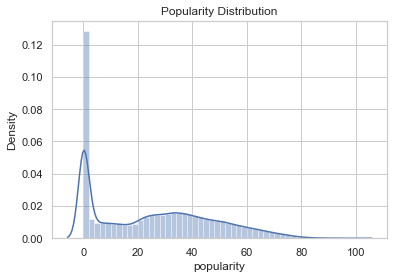

In [75]:
sns.distplot(data_frame['popularity']).set_title('Popularity Distribution')

### We have already observed the below table in the EDA part, but it is a good idea to remind us again because we will use these feauture relations again to predict the popularity.

In [76]:
data_frame.corr()

acousticness  danceability  duration_ms    energy  explicit  \
acousticness          1.000000     -0.263217    -0.089169 -0.750852 -0.208176   
danceability         -0.263217      1.000000    -0.100757  0.204838  0.200842   
duration_ms          -0.089169     -0.100757     1.000000  0.060516 -0.033808   
energy               -0.750852      0.204838     0.060516  1.000000  0.102561   
explicit             -0.208176      0.200842    -0.033808  0.102561  1.000000   
instrumentalness      0.221956     -0.215589     0.103621 -0.177750 -0.130609   
key                  -0.028028      0.026266     0.002020  0.035780  0.005282   
liveness             -0.029654     -0.110033     0.028942  0.134815  0.037288   
loudness             -0.546639      0.249541     0.019791  0.779267  0.106249   
mode                  0.064633     -0.048358    -0.046849 -0.056160 -0.062503   
popularity           -0.396744      0.123746     0.024717  0.328939  0.152545   
speechiness          -0.022437      0.239962    -0.097838 -0.112616  0.353872   
tempo                -0.223840      0.005479    -0.008182  0.266448  0.008075   
valence              -0.166968      0.536713    -0.183199  0.326418 -0.009275   
year                 -0.607515      0.159095     0.105661  0.540850  0.151619   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.221956 -0.028028 -0.029654 -0.546639  0.064633   
danceability             -0.215589  0.026266 -0.110033  0.249541 -0.048358   
duration_ms               0.103621  0.002020  0.028942  0.019791 -0.046849   
energy                   -0.177750  0.035780  0.134815  0.779267 -0.056160   
explicit                 -0.130609  0.005282  0.037288  0.106249 -0.062503   
instrumentalness          1.000000 -0.004619 -0.047941 -0.317562 -0.056731   
key                      -0.004619  1.000000 -0.003368  0.025227 -0.127397   
liveness                 -0.047941 -0.003368  1.000000  0.062695  0.001677   
loudness                 -0.317562  0.025227  0.062695  1.000000 -0.019250   
mode                     -0.056731 -0.127397  0.001677 -0.019250  1.000000   
popularity               -0.300625  0.001951 -0.078959  0.337194  0.007652   
speechiness              -0.133966  0.009648  0.122034 -0.213504 -0.040711   
tempo                    -0.068656  0.005009  0.008586  0.217914  0.002438   
valence                  -0.219188  0.025592 -0.005781  0.302520  0.021592   
year                     -0.114259  0.019194 -0.011852  0.465189 -0.048922   

                  popularity  speechiness     tempo   valence      year  
acousticness       -0.396744    -0.022437 -0.223840 -0.166968 -0.607515  
danceability        0.123746     0.239962  0.005479  0.536713  0.159095  
duration_ms         0.024717    -0.097838 -0.008182 -0.183199  0.105661  
energy              0.328939    -0.112616  0.266448  0.326418  0.540850  
explicit            0.152545     0.353872  0.008075 -0.009275  0.151619  
instrumentalness   -0.300625    -0.133966 -0.068656 -0.219188 -0.114259  
key                 0.001951     0.009648  0.005009  0.025592  0.019194  
liveness           -0.078959     0.122034  0.008586 -0.005781 -0.011852  
loudness            0.337194    -0.213504  0.217914  0.302520  0.465189  
mode                0.007652    -0.040711  0.002438  0.021592 -0.048922  
popularity          1.000000    -0.195329  0.094985  0.063471  0.513227  
speechiness        -0.195329     1.000000 -0.033530  0.050600 -0.215630  
tempo               0.094985    -0.033530  1.000000  0.163118  0.161729  
valence             0.063471     0.050600  0.163118  1.000000 -0.049578  
year                0.513227    -0.215630  0.161729 -0.049578  1.000000

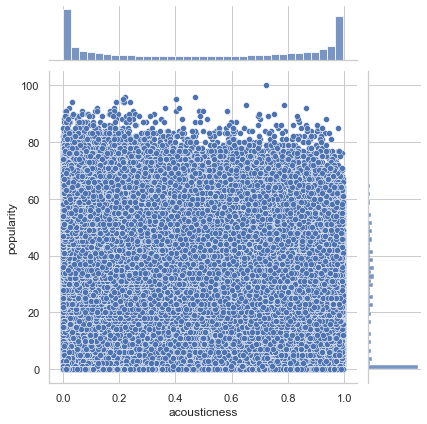

In [77]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = data_frame)

### Observation: **Acousticness and popularity is negatively correlated, as shown in the graph.**

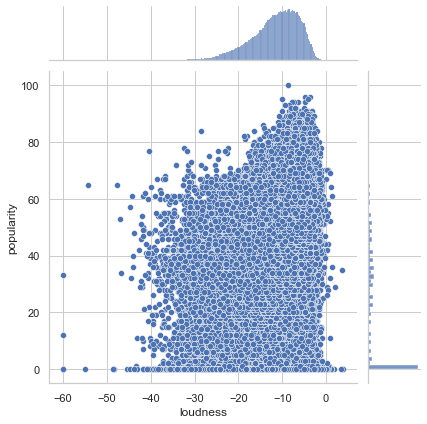

In [78]:
sns.jointplot(x = 'loudness', y = 'popularity', data = data_frame)

### Observation: **We can say that loudness and popularity is positively correlated but not so strong.**

### Now, let's compare these pairwise features with lower-popularity group and higher-popularity group to observe the correlation better:

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

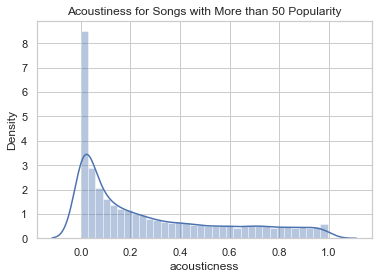

In [79]:
pop_above_50 = data_frame[data_frame.popularity > 50]
sns.distplot(pop_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

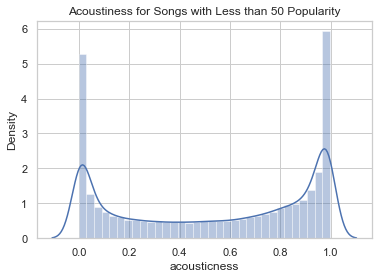

In [80]:
pop_below_50 = data_frame[data_frame.popularity < 50]
sns.distplot(pop_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

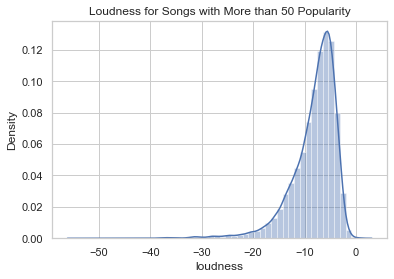

In [81]:
sns.distplot(pop_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')


Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

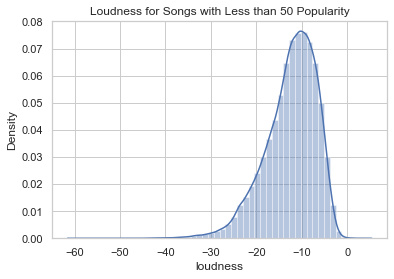

In [82]:
pop_below_50 = data_frame[data_frame.popularity < 50]
sns.distplot(pop_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

### Observation: **From this analysis, loudness and acousticness features have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acousticness differ for songs with more than 50 popularity and songs with less than 50 popularity.**

### We plot a summary of all relationships between the features in case we need them:
#### **(We already observed them in EDA part but this is just a harmless reminder.)**

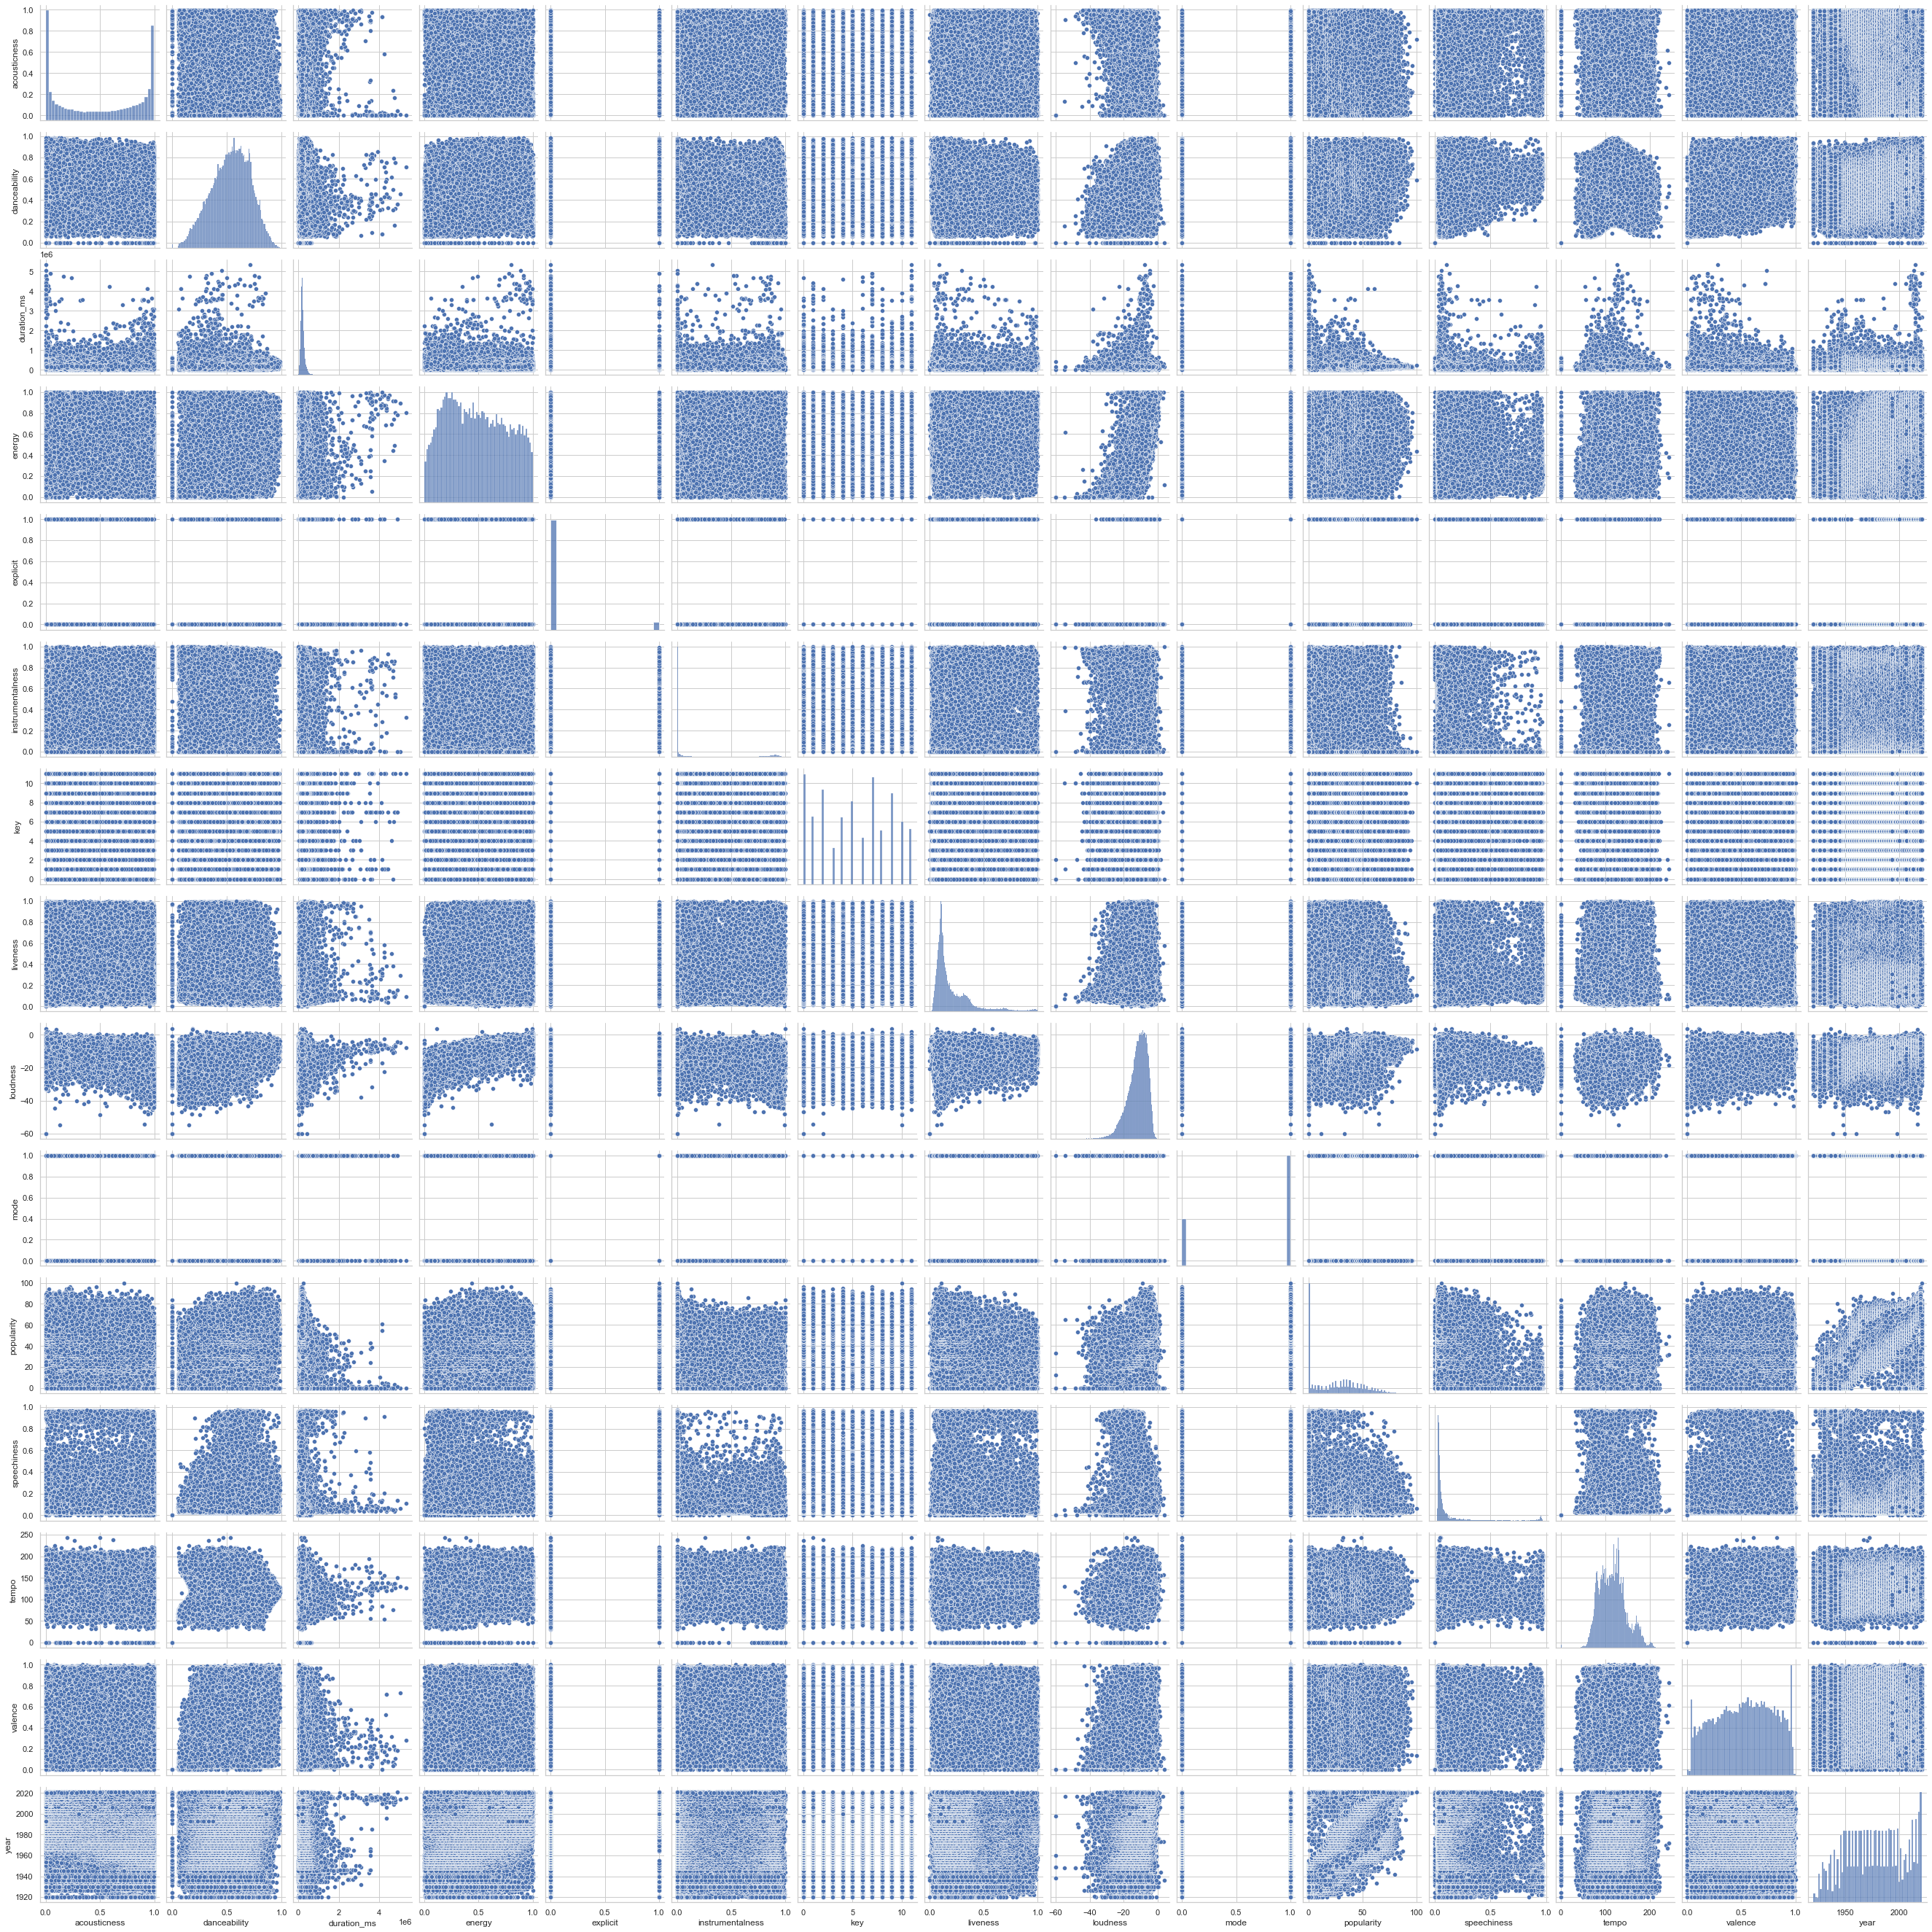

In [83]:
sns.pairplot(data_frame)

## <font color='brown'> Feature Engineering

#### There is no categorical variables that need to be converted from text to numbers using one-hot-encoding. But we define popularity as a binary variable as 0 and 1. For our purposes, we will define above 42 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 42 as "not popular" and encode that as 0.

### **We can check the quartiles in below describe() method:**

In [84]:
data_frame.popularity.describe()

count    174389.000000
mean         25.693381
std          21.872740
min           0.000000
25%           1.000000
50%          25.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

## **<font color='orange'> Popularity** - define and group popularities
### **We checked the first quartile by looking at the above table and find the value as 42, then we divide popularity as lower (less than 42) and as higher (more than 42) popularity. Next, we encode them sas binary variables -> 1 as higher popularity, 0 as lower popularity.**

In [85]:
data_frame.loc[data_frame['popularity'] < 42, 'popularity'] = 0 
data_frame.loc[data_frame['popularity'] >= 42, 'popularity'] = 1
data_frame.loc[data_frame['popularity'] == 1]

acousticness                   artists  danceability  duration_ms  \
1062         0.82100           ['Fats Waller']         0.515       237773   
1063         0.72500           ['Fats Waller']         0.651       183560   
1462         0.84700         ['Benny Goodman']         0.626       520133   
1463         0.96800  ['Blind Willie Johnson']         0.394       198560   
1662         0.58600       ['Louis Armstrong']         0.673       201467   
...              ...                       ...           ...          ...   
174351       0.00984          ['Foo Fighters']         0.530       253840   
174353       0.71500      ['Jazmine Sullivan']         0.734        43320   
174355       0.49800                  ['ZAYN']         0.597       196493   
174361       0.10500              ['Ashnikko']         0.781       172720   
174387       0.92000          ['Taylor Swift']         0.462       244000   

        energy  explicit                      id  instrumentalness  key  \
1062    0.2220         0  3BFRqZFLSrqtQr6cjHbAxU          0.001930    0   
1063    0.0867         0  0eInL1bLAFdHJDL04R0OCP          0.000065    5   
1462    0.7440         0  61znp1Iy11bdJ2YAbwaqw7          0.892000    2   
1463    0.0406         0  2P9nh9pTK96dE0b6NBbTSs          0.045300    9   
1662    0.3770         0  0RNxWy0PC3AyH4ThH3aGK6          0.000000    0   
...        ...       ...                     ...               ...  ...   
174351  0.7590         0  3NUmUIyzNLBp8bCFMH8Mif          0.000000    7   
174353  0.3460         0  0fJ1caLzidzTlIL3pPX1eU          0.000000    2   
174355  0.3680         0  3HSUqAErTyFQWLfLdnFVnB          0.000000    2   
174361  0.4870         1  660rulYF3eLCuW6rQpiMdL          0.000000    1   
174387  0.2400         1  1gcyHQpBQ1lfXGdhZmWrHP          0.000000    0   

        liveness  loudness  mode                                     name  \
1062      0.1900   -16.918     0                        Ain't Misbehavin'   
1063      0.1690   -18.882     1                        Two Sleepy People   
1462      0.1450    -9.189     0                         Sing, Sing, Sing   
1463      0.0976   -23.179     1  Dark Was the Night, Cold Was the Ground   
1662      0.3320   -14.141     1                           Mack the Knife   
...          ...       ...   ...                                      ...   
174351    0.3190    -7.067     1                         Waiting On A War   
174353    0.3940   -11.722     1                           Precious' Tale   
174355    0.1090   -10.151     0                                Connexion   
174361    0.0802    -7.301     0                               Little Boy   
174387    0.1130   -12.077     1                       champagne problems   

        popularity release_date  speechiness    tempo  valence  year  
1062             1         1926       0.0575   98.358    0.350  1926  
1063             1         1926       0.0480   87.221    0.540  1926  
1462             1         1928       0.0662  113.117    0.259  1928  
1463             1         1928       0.0440  116.117    0.200  1928  
1662             1         1929       0.0697   88.973    0.713  1929  
...            ...          ...          ...      ...      ...   ...  
174351           1   2021-01-14       0.0351  131.999    0.502  2021  
174353           1   2021-01-08       0.3550   88.849    0.930  2021  
174355           1   2021-01-15       0.0936  171.980    0.590  2021  
174361           1   2021-01-15       0.1670  129.941    0.327  2021  
174387           1   2021-01-07       0.0377  171.319    0.320  2021  

[45159 rows x 19 columns]

## **<font color='blue'> Model Fitting and Predicting**

#### **For simplicity and using binary classification, we define as the top 25% popular songs as "popular", and the bottom 75% popular songs as "not popular", as you saw in the above cells.**
#### Now we will continue with the model fitting and predicting. We will use different models:
 
 **- Logistic Regression**
 
 **- Random Forest Classifier**
 
 **- K-Nearest Neighbors Classifier**
 
 **- Decision Tree Classifier**
 
 **- XGBOOST**
 
 #### *Note: AUC: The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.*

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### **For feature selection, we will select the following features which are only based on music theory and not artist/song information:**

In [87]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "valence"]

#### **Next, we define 80% of the dataframe for training and 20% of the dataframe for testing.**

In [88]:
training = data_frame.sample(frac = 0.8,random_state = 420)
x_train = training[features]
y_train = training['popularity']
x_test = data_frame.drop(training.index)[features]

#### **We add a validation dataset using train_test_split.**

In [89]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 420)

### **<font color='brown'>1. Logistic Regression**

#### **"Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. It is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables."** 
#### **Since we converted the feature "popularity" to binary by dividing them in lower-higher groups, it is a great idea to use this method.**

In [90]:
LR_Model = LogisticRegression()
LR_Model.fit(x_train, y_train)
LR_Predict = LR_Model.predict(x_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.7469447729634806
AUC: 0.5


### **<font color='brown'>2. Random Forest Classifier**

#### **"Random forest model is made up of a large number of small decision trees, called estimators, which each produce their own predictions"**

In [91]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(x_train, y_train)
RFC_Predict = RFC_Model.predict(x_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.7919936924345052
AUC: 0.6644862804061189


### **<font color='brown'>3. K-Nearest Neighbors Classifier**

#### **"A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in."**

In [92]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(x_train, y_train)
KNN_Predict = KNN_Model.predict(x_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7064473354119629
AUC: 0.5420934241306049


### **<font color='brown'>4. Decision Tree Classifier**

#### **"Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed."**

In [93]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(x_train, y_train)
DT_Predict = DT_Model.predict(x_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.7183456975952407
AUC: 0.6329789512562066


### **- <font color='purple'>Efforts on hyper-parameter tuning to increase the performance of models**

In [94]:
# cross validation function
from sklearn.model_selection import cross_val_score

# create a model
cross_DT_Model = DecisionTreeClassifier(criterion="entropy")

# perform CV with the given settings
accuracies = cross_val_score(cross_DT_Model, x_train, y_train, cv=5, scoring="accuracy")
accuracies

array([0.72287429, 0.71682645, 0.72206792, 0.71779938, 0.72478832])

In [95]:
# Validation accuracy can be estimated using the mean of the CV accuracies
# Bonus: we can calculate a standard deviation over different folds
"Accuracy: {:.2f} (+/- {:.2f})".format(accuracies.mean(), accuracies.std() * 2)

'Accuracy: 0.72 (+/- 0.01)'

In [96]:
# checking the hyper-parameters of the Decision Tree
cross_DT_Model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [97]:
# candidate max depths
max_depth_values = np.arange(1, 20)
train_set_accuracies = []
val_set_accuracies = []

for depth in max_depth_values:
  cross_DT_Model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
  cross_DT_Model.fit(x_train, y_train)
  train_preds = cross_DT_Model.predict(x_train)
  val_preds = cross_DT_Model.predict(x_valid)
  train_set_accuracies.append(accuracy_score(y_train, train_preds))
  val_set_accuracies.append(accuracy_score(y_valid, val_preds))

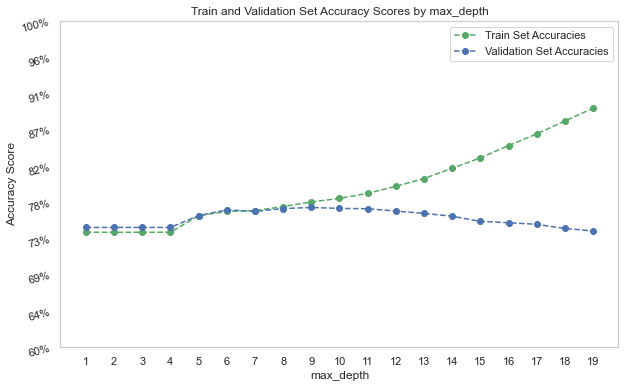

In [98]:
fig, ax = plt.subplots(figsize = (10, 6))

# the label/tick locations
x_ticks = np.arange(len(max_depth_values))
# yloc between 0.6-1
y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax.plot(train_set_accuracies, "go--", label = "Train Set Accuracies")
ax.plot(val_set_accuracies, "bo--", label = "Validation Set Accuracies")

ax.set_ylabel("Accuracy Score")
ax.set_xlabel("max_depth")
ax.set_title("Train and Validation Set Accuracy Scores by max_depth")
ax.set_xticks(x_ticks)
ax.set_xticklabels(max_depth_values)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.legend()

plt.yticks(rotation = 15)
plt.grid()
plt.show()

### **<font color='red'>Tree Visualization**

In [99]:
# create a model with max_depth set to 3 for chart readability
cross_DT_Model = DecisionTreeClassifier(max_depth=3, criterion="entropy")
# train the mode
cross_DT_Model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [100]:
# the required utility function
from sklearn.tree import export_text

# execute and print the output
print(export_text(cross_DT_Model, feature_names=list(x_train.columns)))

|--- acousticness <= 0.76
|   |--- duration_ms <= 159675.00
|   |   |--- speechiness <= 0.73
|   |   |   |--- class: 0
|   |   |--- speechiness >  0.73
|   |   |   |--- class: 0
|   |--- duration_ms >  159675.00
|   |   |--- instrumentalness <= 0.03
|   |   |   |--- class: 0
|   |   |--- instrumentalness >  0.03
|   |   |   |--- class: 0
|--- acousticness >  0.76
|   |--- acousticness <= 0.94
|   |   |--- liveness <= 0.14
|   |   |   |--- class: 0
|   |   |--- liveness >  0.14
|   |   |   |--- class: 0
|   |--- acousticness >  0.94
|   |   |--- valence <= 0.46
|   |   |   |--- class: 0
|   |   |--- valence >  0.46
|   |   |   |--- class: 0



### **<font color='brown'>5. XGBOOST**

#### **The XGB Classifier:** a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Can be used to solve regression, classification, ranking, and user-defined prediction problems.

In [101]:
XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(x_train, y_train)
XGB_Predict = XGB_Model.predict(x_valid)
XGB_Accuracy = accuracy_score(y_valid, XGB_Predict)
print("Accuracy: " + str(XGB_Accuracy))

XGB_AUC = roc_auc_score(y_valid, XGB_Predict) 
print("AUC: " + str(XGB_AUC))

[13:36:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.7823531519908253
AUC: 0.6354650118008068


## **<font color='blue'>Model Performance Summary**
### In this part, we will summarize the methods we used and compare their **accuracy** and **AUC** values to determine the best one:

In [102]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                     'RandomForestClassifier', 
                                                     'KNeighborsClassifier',
                                                     'DecisionTreeClassifier',
                                                     'XGBClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         XGB_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                'RandomForestClassifier', 
                                                'KNeighborsClassifier',
                                                'DecisionTreeClassifier',
                                                'XGBClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC,
                                                         XGB_AUC]})

#### **With the above and below codes, we can compare the accuracy and AUC values of 5 methods we used previously, and we can easily see which one is the most accurate one by sorting them in a table:**

In [103]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

Model  Accuracy
1  RandomForestClassifier  0.791994
4           XGBClassifier  0.782353
0      LogisticRegression  0.746945
3  DecisionTreeClassifier  0.718346
2    KNeighborsClassifier  0.706447

#### **Here, above, we can see that *Random Forest Classifier* is the most accurate one, but there is no big gap between the Random Forest Classifier and the XGB Classifier.**

In [104]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

Model       AUC
1  RandomForestClassifier  0.664486
4           XGBClassifier  0.635465
3  DecisionTreeClassifier  0.632979
2    KNeighborsClassifier  0.542093
0      LogisticRegression  0.500000

#### **Also, in the same manner, by looking at the above table we can see the rankings of AUC scores. *The XGB Classifier* takes the first place with %63 AUC.**

## **<font color='red'>Conclusion**

#### **- Using a dataset of 174,000 Spotify Tracks, we were able to predict popularity (greater than 42 popularity) using audio-based metrics such as danceability, acousticness and energy without external metrics such as artist name, genre, and release date.** 

#### **- The Random Forest Classifier was the best performing algorithm with 79% accuracy and 66% AUC.** 

#### **- The XGB Classifier was the second best performing algorithm with 78% accuracy and 63% AUC.**

## <font color='purple'>Creating a simple song recommendation system using similarity metrics and Nearest Neighbors methods

In [105]:
import csv
import os.path
import json

### Functions for normalizing and reading data from the file:

In [106]:
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
def normalize_data(column):
    max_value = column.max()
    min_value = column.min()
    result = (column - min_value) / (max_value - min_value)
    
    return result

def read_data(data_file):
    raw_data = open(data_file,'rt')
    data = pd.read_csv(raw_data)
    data = data.replace(np.nan,"")
    
    return data

#### We decided to read data from the data.csv again, since we have already played with the data in previous parts. For the sake of the clarity of the dataset it is better to read data from the file again.

In [107]:
ALL_SONGS = read_data('data.csv')
ALL_SONGS = ALL_SONGS.drop_duplicates(subset=['artists','name'],keep='first')
print(ALL_SONGS.shape)

ALL_SONGS.head()

(159441, 19)


acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

#### **We defined the features as:**

#### **features** = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "mode", "speechiness", "tempo", "valence"]

In [108]:
data_of_song = ALL_SONGS[features] #we already defined features in the previous part
name_of_song = ALL_SONGS[['name','artists']]

#### **Normalizing data** with using the function previously defined above:

In [120]:
for attr in features:
    data_of_song[attr] = normalize_data(ALL_SONGS[attr])
    
data_of_song

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.994980      0.605263     0.030637  0.2240          0.000522   
1           0.645582      0.862348     0.027237  0.5170          0.026400   
2           0.996988      0.654858     0.029792  0.1860          0.000018   
3           0.000174      0.738866     0.078215  0.7980          0.801000   
4           0.296185      0.712551     0.030054  0.7070          0.000246   
...              ...           ...          ...     ...               ...   
174365      0.979920      0.362348     0.070540  0.1210          0.889000   
174369      0.998996      0.300607     0.064549  0.0287          0.908000   
174371      0.998996      0.347166     0.037830  0.0165          0.878000   
174375      0.991968      0.319838     0.055949  0.0573          0.879000   
174377      0.798193      0.434211     0.026209  0.2110          0.000000   

             key  liveness  mode  speechiness     tempo  valence  
0       0.454545    0.3790   0.0     0.096395  0.615900   0.6340  
1       0.454545    0.0809   0.0     0.054995  0.356823   0.9500  
2       0.000000    0.5190   1.0     0.179197  0.400810   0.6890  
3       0.181818    0.1280   1.0     0.043769  0.525640   0.0422  
4       0.909091    0.4020   0.0     0.079094  0.501324   0.2990  
...          ...       ...   ...          ...       ...      ...  
174365  0.181818    0.1350   1.0     0.054789  0.541290   0.1060  
174369  0.727273    0.0995   1.0     0.058084  0.581651   0.0678  
174371  0.818182    0.0774   0.0     0.046859  0.521422   0.1510  
174375  0.272727    0.1200   1.0     0.053038  0.332927   0.0373  
174377  0.363636    0.1960   1.0     0.037075  0.388942   0.2280  

[159441 rows x 11 columns]

#### You can see the name of the songs and appropriate artists in the below table:

In [110]:
name_of_song

name  \
0                                Keep A Song In Your Soul   
1                                    I Put A Spell On You   
2                                            Golfing Papa   
3       True House Music - Xavier Santos & Carlos Gomi...   
4                                               Xuniverxe   
...                                                   ...   
174365                                           I giorni   
174369                                     Nuvole bianche   
174371                                        Una Mattina   
174375                                              Night   
174377                                      A Little More   

                                         artists  
0                                ['Mamie Smith']  
1                      ["Screamin' Jay Hawkins"]  
2                                ['Mamie Smith']  
3                            ['Oscar Velazquez']  
4                                       ['Mixe']  
...                                          ...  
174365  ['Ludovico Einaudi', 'Johannes Bornlöf']  
174369  ['Ludovico Einaudi', 'Johannes Bornlöf']  
174371  ['Ludovico Einaudi', 'Johannes Bornlöf']  
174375  ['Ludovico Einaudi', 'Johannes Bornlöf']  
174377                          ['Alessia Cara']  

[159441 rows x 2 columns]

## <font color='brown'>Create training data

**- Data will be song[attributes, recommended song1, recommended song2, recommended song3, recommended song4, recommended song5]**

**- Attributes consist of {"acousticness", "valence", "tempo", "speechiness", "loudness", "key", "liveness", "instrumentalness", "danceability"]**

**- The recommended songs will be the target fields and be represented with their one hot encoded representation**

### **<font color='green'>Create One Hot Encoding**
- **Encode uses ["name of song","['artist']"] as key**
- **Decode uses a number as key**

In [111]:
ENCODER = dict()
DECODER = dict()

## enumerate: it takes the given input as a collection or tuples and returns it as an enumerate object.
for i,song in enumerate(name_of_song.values):
    if not (song[0],song[1]) in ENCODER:
        ENCODER[song[0],song[1]] = i
        DECODER[i] = song

#### **Creating a function for recommended songs to use later:**

In [112]:
def recommend_songs(song):
    global name_of_song, data_of_song
    
    RECOMMENDED_SONGS = []
    distances = []
    
    for pos,targ_song in enumerate(data_of_song.values):
        distances.append((np.linalg.norm(song - targ_song),pos))
    
    distances.sort(key=lambda x:x[0])
    AMTOFRECOMMENDEDSONGS = 5
    for x in range(AMTOFRECOMMENDEDSONGS):
        RECOMMENDED_SONGS.append(ENCODER[name_of_song.values[distances[x+1][1]][0],name_of_song.values[distances[x+1][1]][1]])

    return RECOMMENDED_SONGS

#### **Create a list as ENCODER and write a song and artist name to have its own code:**

In [113]:
ENCODER [('Let Me Love You (Until You Learn To Love Yourself)',"['Ne-Yo']")]

35248

**Test the code:** 35248 ->> find the song

In [114]:
print(ALL_SONGS.values[35248])
test = data_of_song.values[35248]
test

[0.248 "['Ne-Yo']" 0.6579999999999999 251627 0.677 0
 '4kte3OcW800TPvOVgrLLj8' 0.0 5 0.368 -6.627999999999999 1
 'Let Me Love You (Until You Learn To Love Yourself)' 69 '2012-01-01'
 0.0393 124.91 0.248 2012]


array([0.24899598, 0.6659919 , 0.0462541 , 0.677     , 0.        ,
       0.45454545, 0.368     , 1.        , 0.04047374, 0.51296267,
       0.248     ])

In [115]:
name_of_song.values[35248]

array(['Let Me Love You (Until You Learn To Love Yourself)', "['Ne-Yo']"],
      dtype=object)

#### **Recommend similar songs with the test data:**

In [116]:
recommend = recommend_songs(test)
for song in recommend:
    print(ALL_SONGS.values[song])

[0.219 "['Supertramp']" 0.532 378893 0.6729999999999999 0
 '3DyDoJibN4Cx2zvvtIVQqE' 8.35e-05 5 0.313 -6.654 1 'From Now On' 49
 '1977-01-01' 0.0322 122.295 0.194 1977]
[0.29600000000000004 "['Erasure']" 0.596 237800 0.731 0
 '5QQCp4fQiU9I2FU9FvJVV2' 3.64e-06 5 0.301 -9.961 1 'Always' 44
 '1994-04-26' 0.0284 103.027 0.308 1994]
[0.235 "['OneRepublic']" 0.626 144530 0.726 0 '2K0r5GD5zYlEMx2M7ZMcqG' 0.0
 5 0.304 -5.015 1 'Better Days' 76 '2020-03-25' 0.0376 89.132 0.257 2020]
[0.158 "['Wendy Moten']" 0.59 257800 0.5589999999999999 0
 '0KMZsxJalrqyJSWghlpPmb' 3.96e-06 5 0.361 -8.916 1
 'Come In Out Of The Rain' 43 '1992-01-01' 0.0269 114.327 0.311 1992]
[0.2 "['Ozuna']" 0.735 233827 0.703 0 '5EId1m4DNwTf3at31w8bPJ' 0.0 6 0.259
 -4.249 1 'El Farsante' 74 '2017-08-25' 0.0611 120.007 0.32299999999999995
 2017]


#### **In above, you can see the similar songs to the one we entered as test. We make other recommendations as well with the same method.**

In [117]:
#end of milestone 3

In [118]:
#end of this project

Rana Islek